 # LEAD SCORING CASE STUDY

In [1015]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# Import RFE
from sklearn.feature_selection import RFE

In [1016]:
## Read the file

In [1017]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Basic Analysis

In [1018]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1019]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1020]:
# check for duplicate 
df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [1021]:
# check for duplicate 
df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

## EDA

In [1022]:
# Prospect ID and Lead number are the columns that have all unique values i.e. they are identifier variables and can be dropped
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [1023]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1024]:
df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1025]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1026]:
df.drop(['City', 'Country'], 1, inplace = True)

## Handling Null Values

In [1027]:
# There are many categorical variable that has value "Select" which is equal to null so fill them with NA
df = df.replace('Select', np.nan)

In [1028]:
df = df.replace('select', np.nan)

In [1029]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,NaN,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,No,NaN,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1030]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

## Dropping the column with unique values

In [1031]:
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [1032]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [1033]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [1034]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [1035]:
# % of null value
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Drop columns with more the 40 % as null values

In [1036]:
df = df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)

In [1037]:
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Tags      

## Handling Object type columns

In [1038]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [1039]:
object_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [1040]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Tags                        

## Filling the null value in the categorical variable

In [1041]:
lead_src=df['Lead Source'].mode()[0]

In [1042]:
lead_src

'Google'

In [1043]:
df['Lead Source'] = df['Lead Source'].fillna(lead_src)

In [1044]:
lst_ac=df['Last Activity'].mode()[0]
lst_ac

'Email Opened'

In [1045]:
df['Last Activity'] = df['Last Activity'].fillna(lst_ac)

In [1046]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1047]:
df['Specialization']=df['Specialization'].fillna('Unavailable')

In [1048]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1049]:
df['What is your current occupation']=df['What is your current occupation'].fillna('Unavailable')

In [1050]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1051]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not Provided')

## Check values with Yes/No valued columns

In [1052]:
df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [1053]:
df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [1054]:
df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [1055]:
df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [1056]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [1057]:
df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [1058]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1059]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1060]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [1061]:
df['Tags']=df['Tags'].fillna('Unavailable')

## Handled all the categorical data and now to check other data if any null is present

In [1062]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                            0
Tags                                          

## Analysis of categorical data

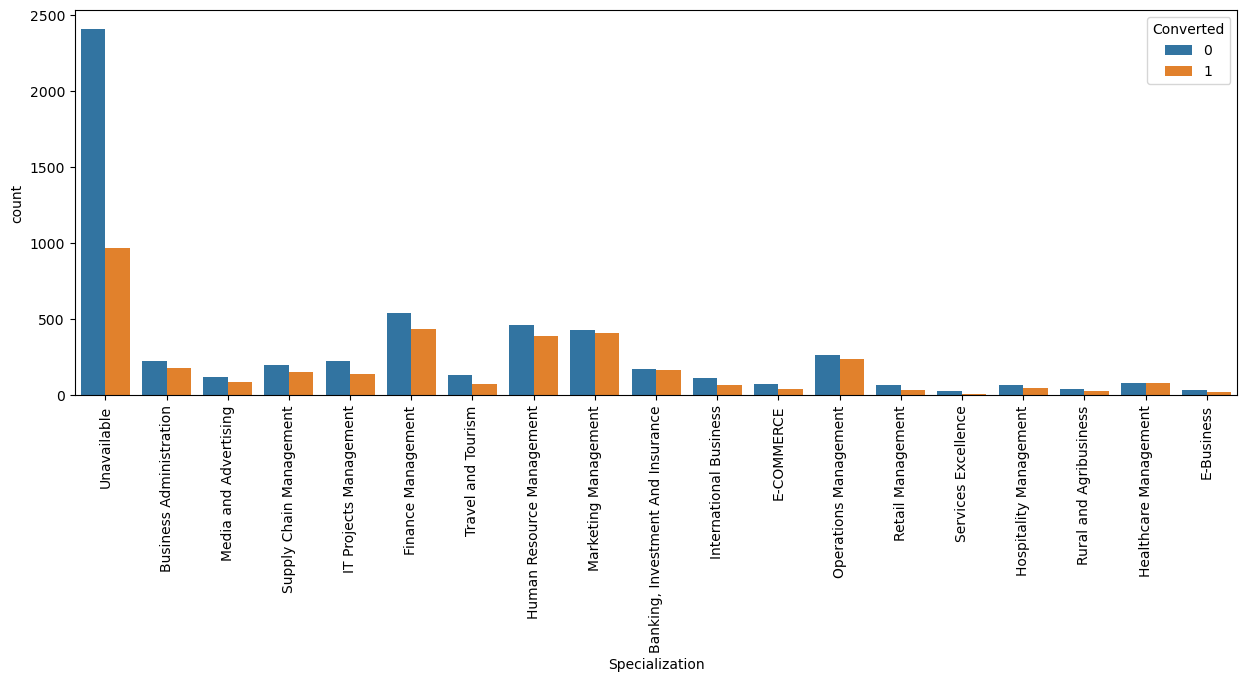

In [1063]:
plt.figure(figsize=(15,5))
sns.countplot(x="Specialization", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

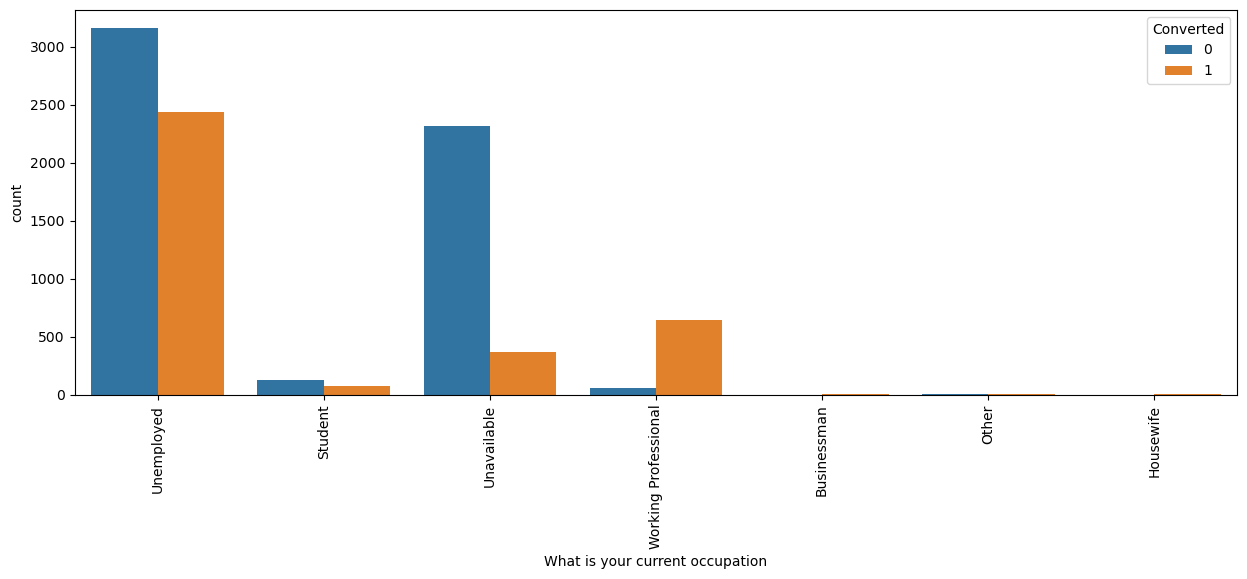

In [1064]:
plt.figure(figsize=(15,5))
sns.countplot(x="What is your current occupation", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

In [1065]:
df['What is your current occupation'] = df['What is your current occupation'].replace('Unavailable', 'Unemployed')

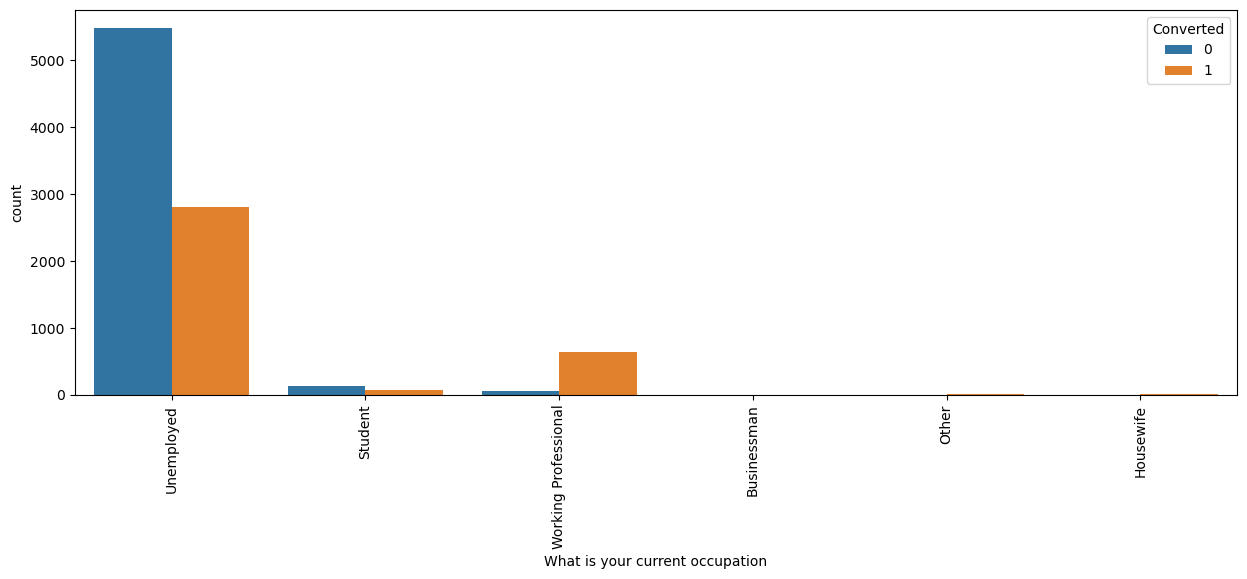

In [1066]:
plt.figure(figsize=(15,5))
sns.countplot(x="What is your current occupation", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

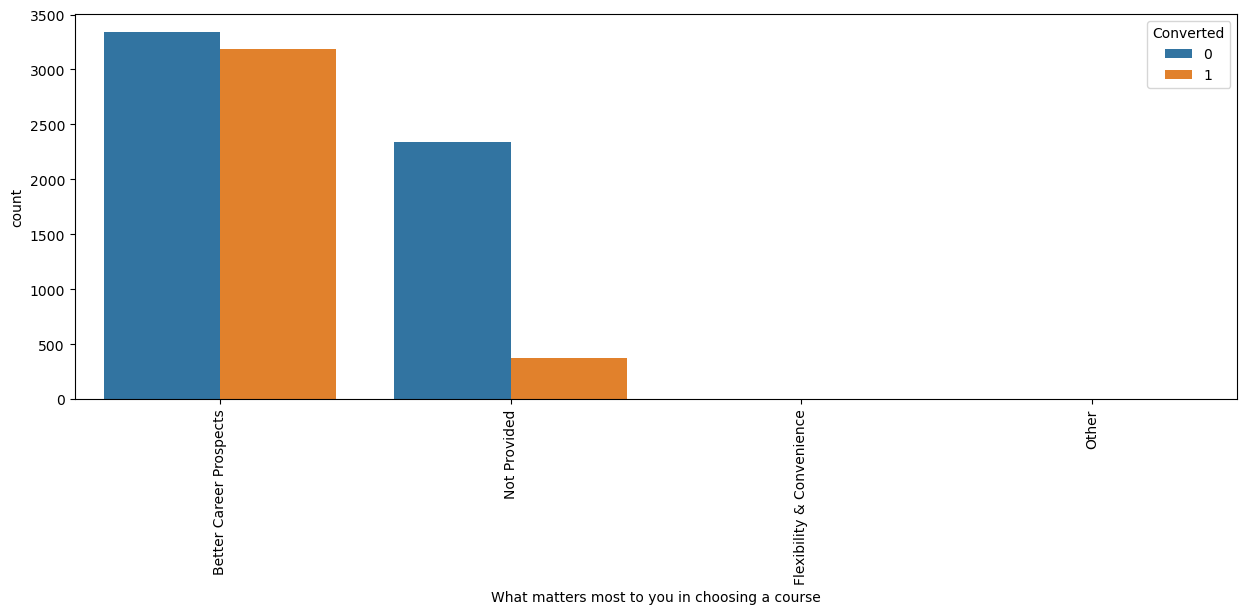

In [1067]:
plt.figure(figsize=(15,5))
sns.countplot(x="What matters most to you in choosing a course", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

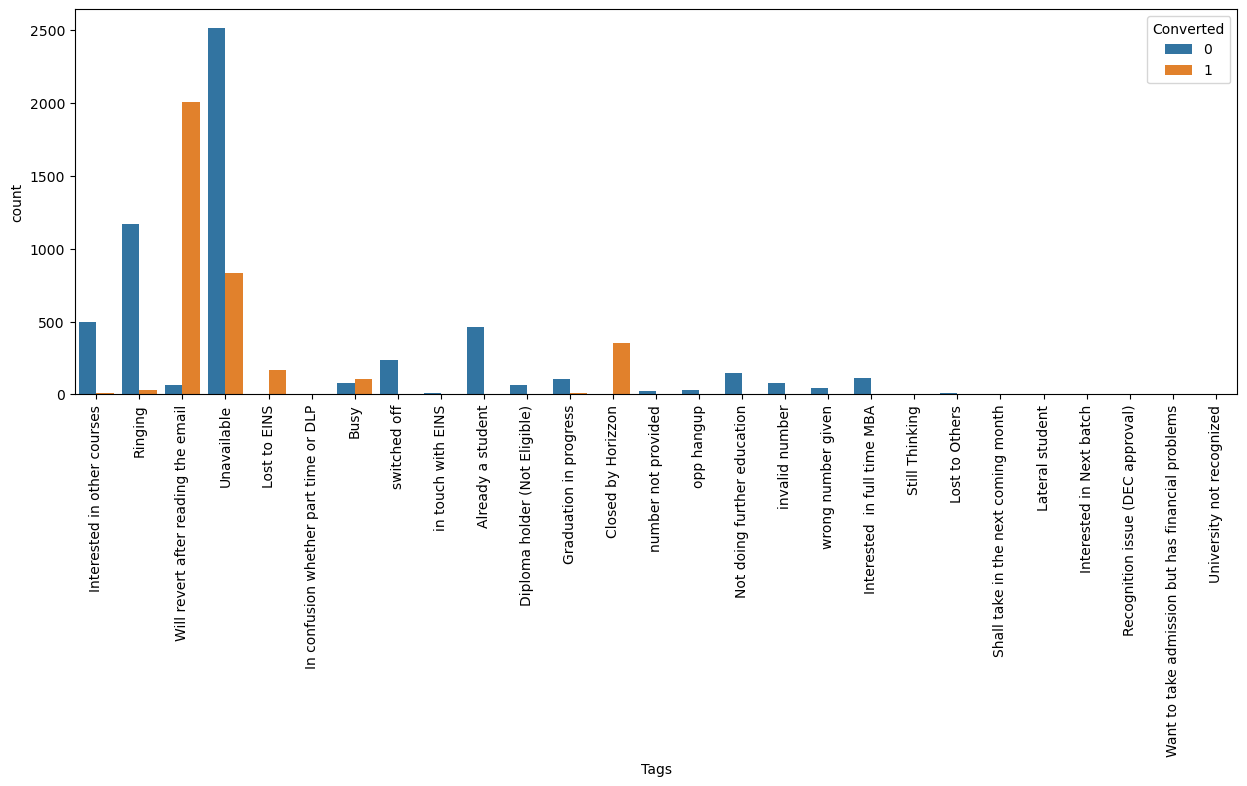

In [1068]:
plt.figure(figsize=(15,5))
sns.countplot(x="Tags", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

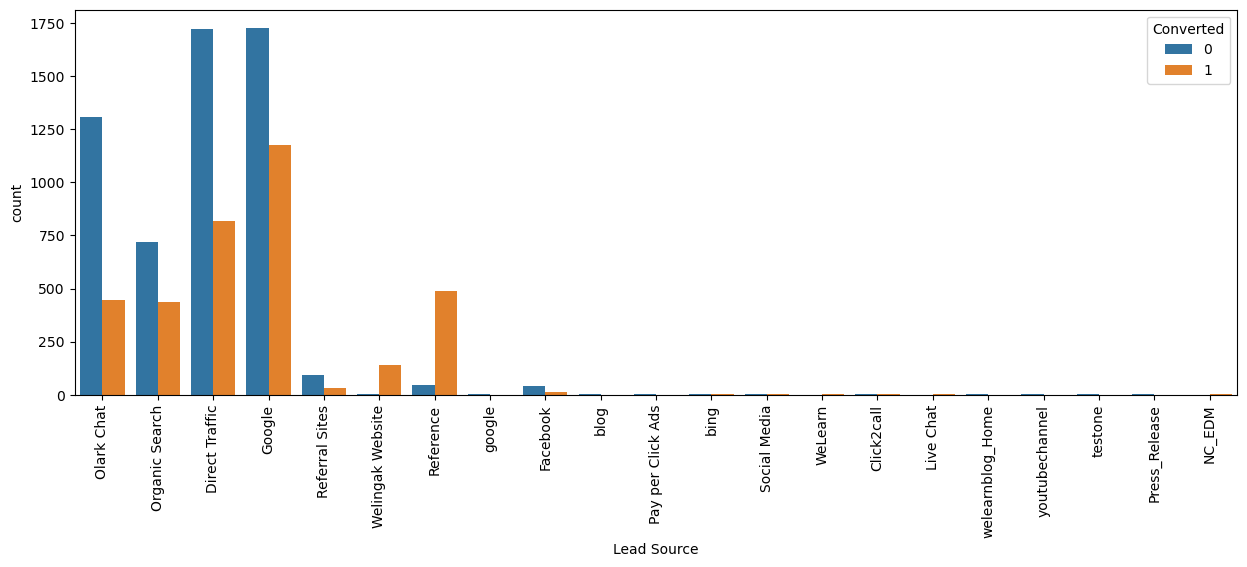

In [1069]:
plt.figure(figsize=(15,5))
sns.countplot(x="Lead Source", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

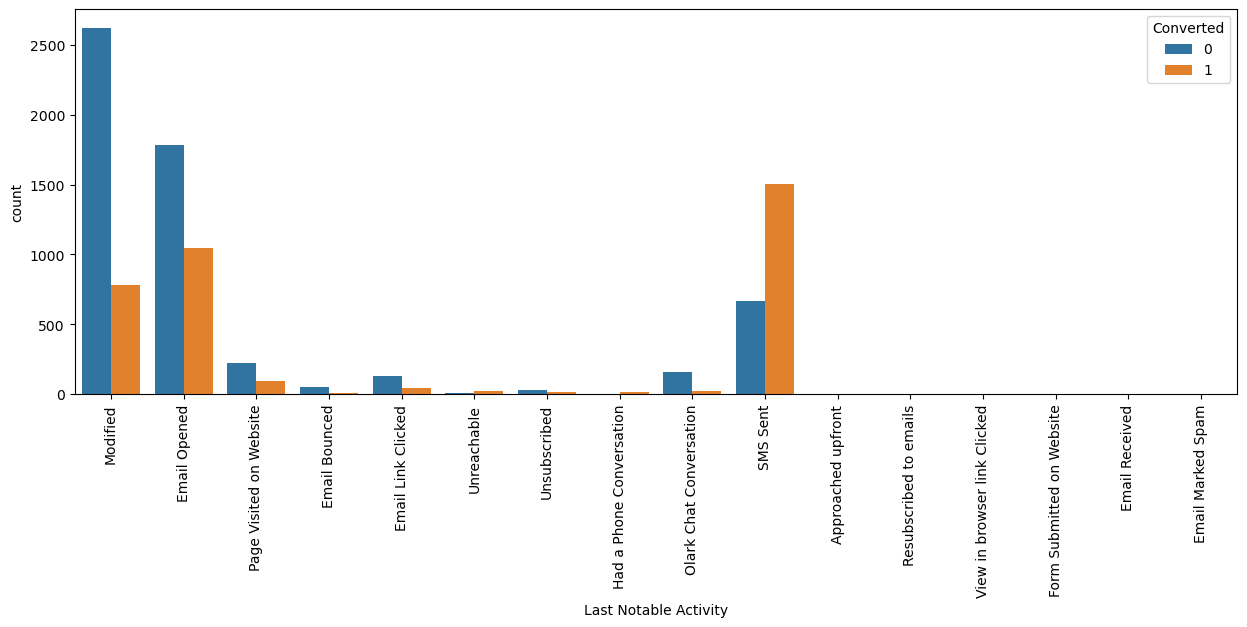

In [1070]:
plt.figure(figsize=(15,5))
sns.countplot(x="Last Notable Activity", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()


## Numeric data analysis and filling the NULL values

In [1071]:
tot_visit=df['TotalVisits'].median()

In [1072]:
df['TotalVisits']=df['TotalVisits'].fillna(tot_visit)

In [1073]:
per_visit_view=df['Page Views Per Visit'].median()

In [1074]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(per_visit_view)

## Rechecking the data after filling the NULL values

In [1075]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                                             0
A free copy of Mastering The In

In [1076]:
df.shape

(9240, 21)

In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

In [1078]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


## To Check the outlier of the value in the column

In [1079]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [1080]:
numeric_col = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [1081]:
numeric_col.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


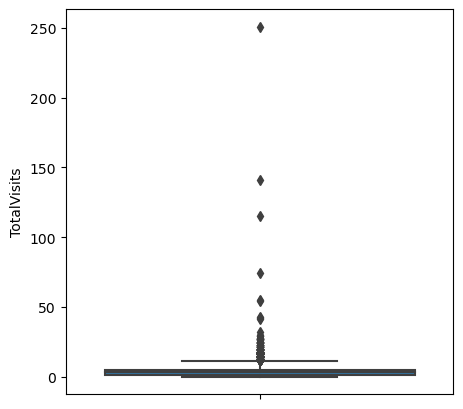

In [1082]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['TotalVisits'])
plt.show()

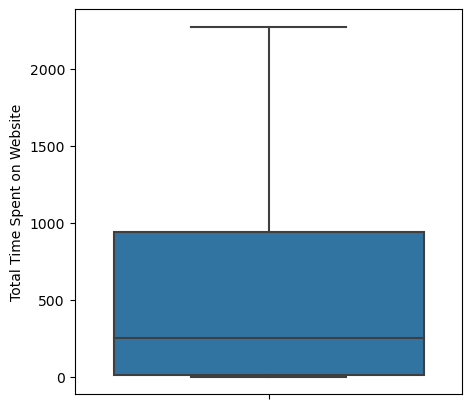

In [1083]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

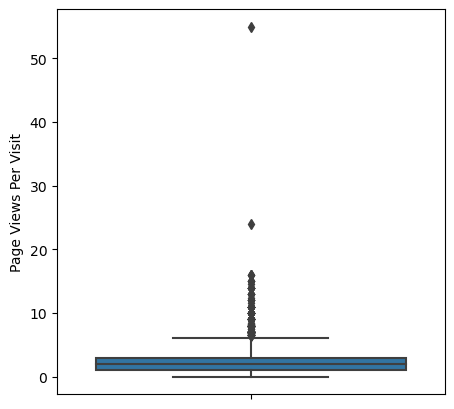

In [1084]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

## Handling Outliers

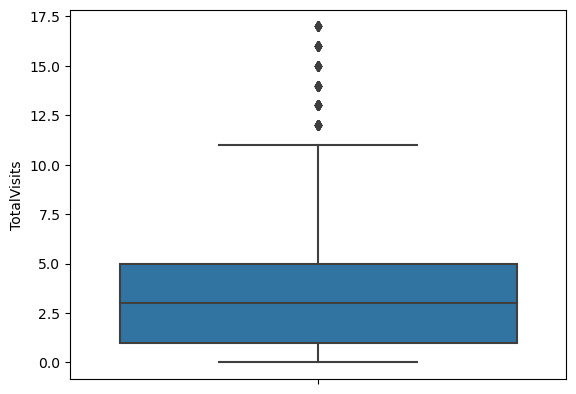

In [1085]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

## Corelation between numeric columns

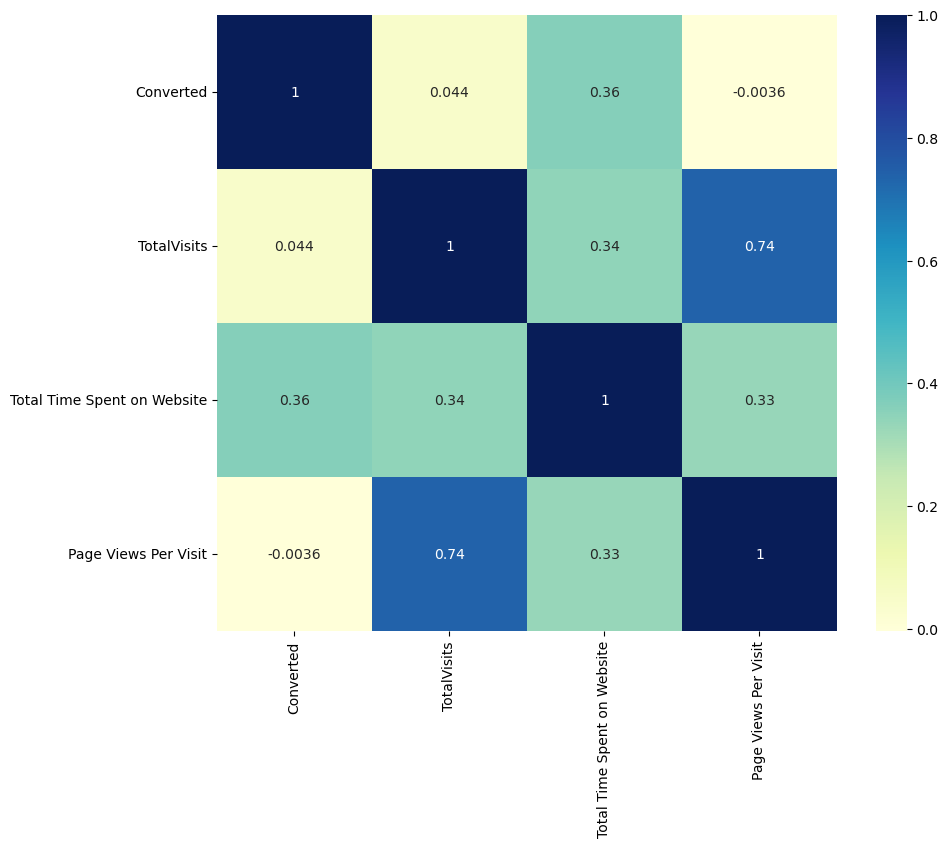

In [1086]:
# Corelation between numeric data
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Bivariate Analysis to Numeric Data

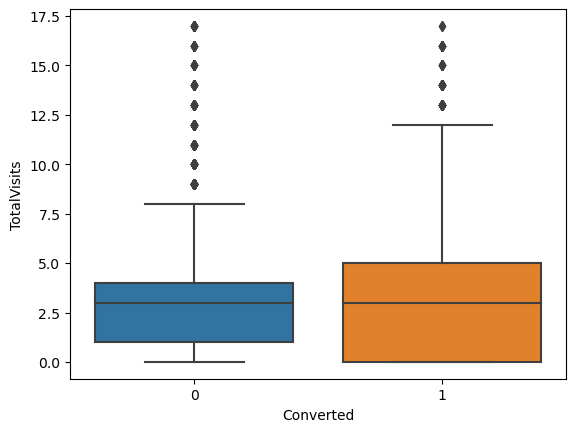

In [1087]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Median for converted and not converted leads are the close.
Nothing conclusive can be said on the basis of Total Visits

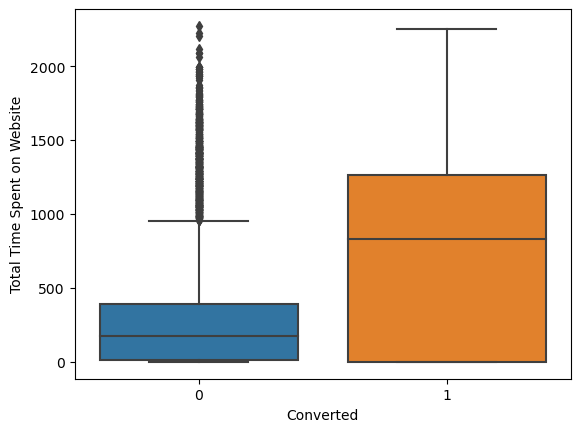

In [1088]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

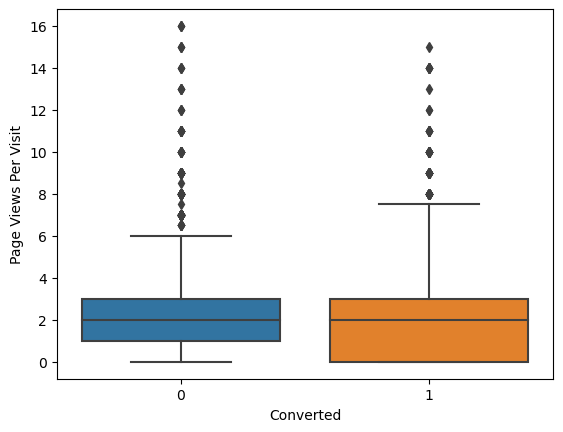

In [1089]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

## Yes/No valued Columns

In [1090]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unavailable,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unavailable,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened


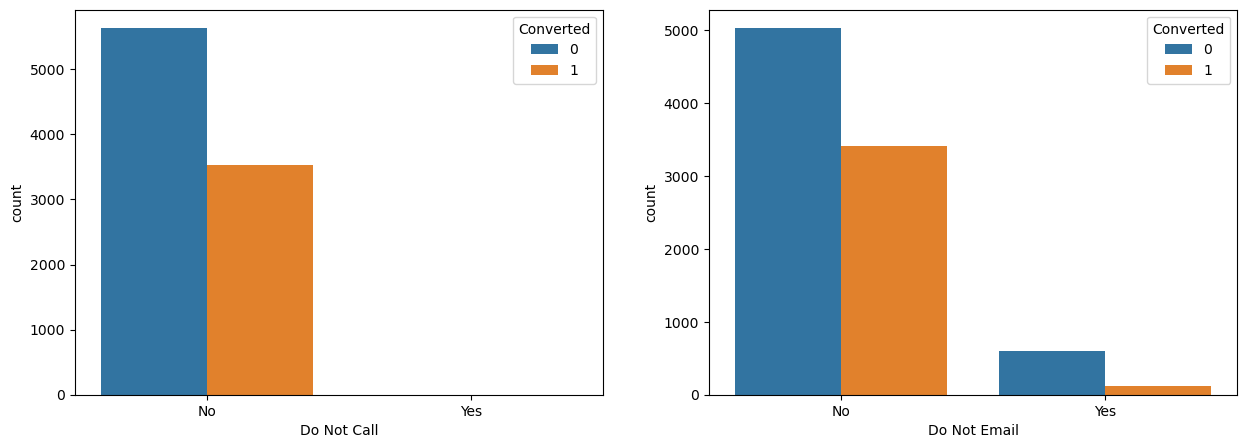

In [1091]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="Do Not Call", hue="Converted", data=df)
plt.subplot(1, 2, 2)
sns.countplot(x="Do Not Email", hue="Converted", data=df)
plt.show()

In [1092]:
df['Do Not Call'].value_counts(dropna=False)

No     9155
Yes       2
Name: Do Not Call, dtype: int64

In [1093]:
col_to_dropp='Do Not Call'
df = df.drop(col_to_dropp, axis=1)

In [1094]:
df['X Education Forums'].value_counts(dropna=False)

No    9157
Name: X Education Forums, dtype: int64

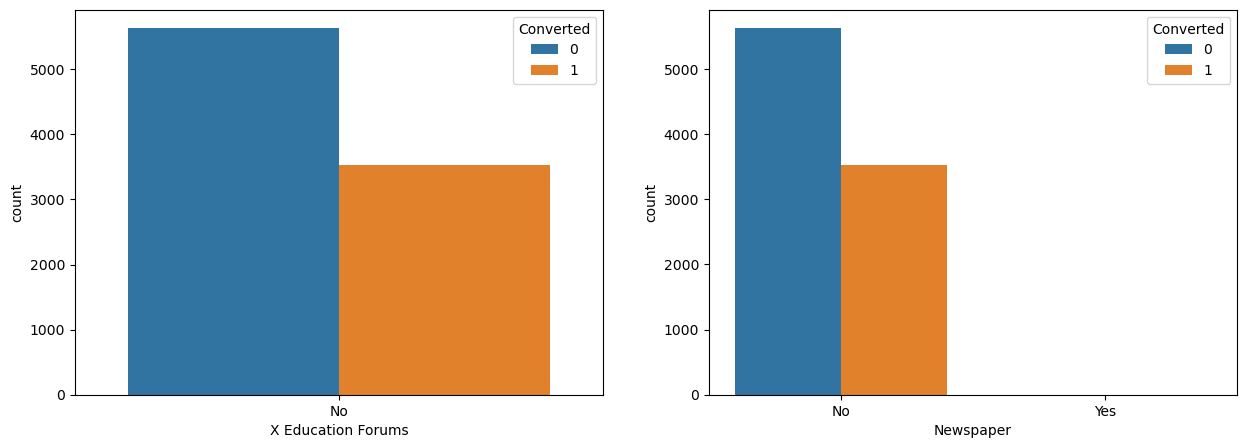

In [1095]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="X Education Forums", hue="Converted", data=df)
plt.subplot(1, 2, 2)
sns.countplot(x="Newspaper", hue="Converted", data=df)
plt.show()

In [1096]:
col_to_dropp1='X Education Forums'
df = df.drop(col_to_dropp1, axis=1)

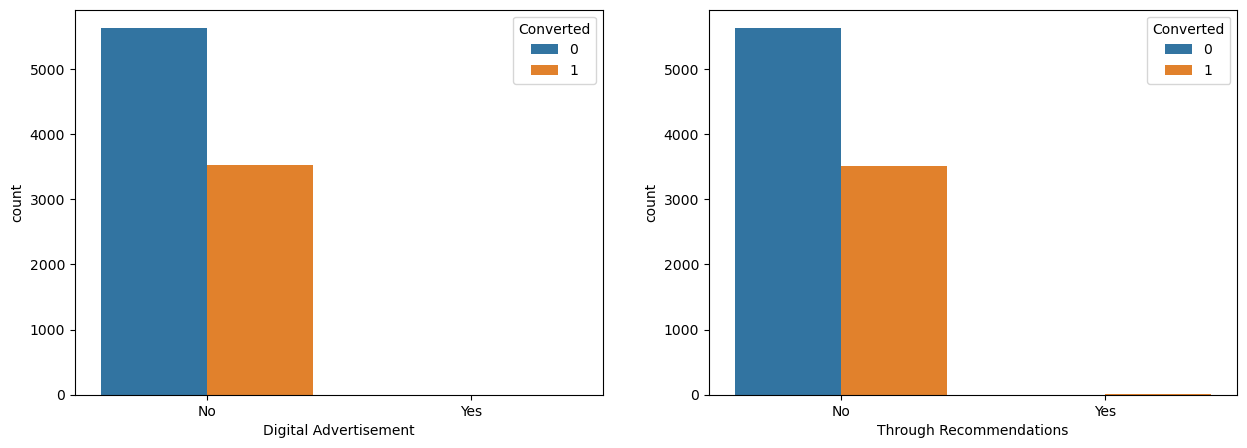

In [1097]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="Digital Advertisement", hue="Converted", data=df)
plt.subplot(1, 2, 2)
sns.countplot(x="Through Recommendations", hue="Converted", data=df)
plt.show()

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

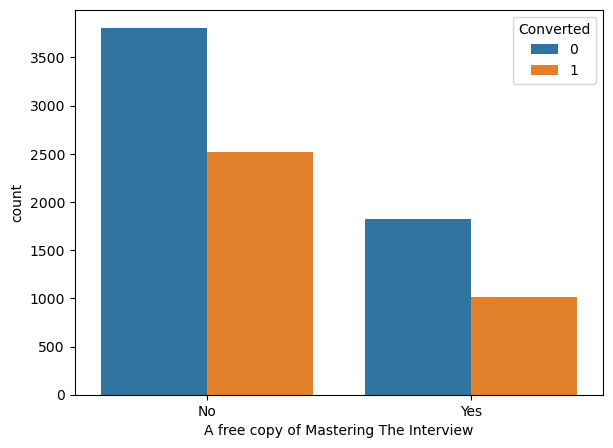

In [1098]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=df)

## Droping the columns as most of them have single values only

In [1099]:
col_list_to_drop=['Through Recommendations','Digital Advertisement','Newspaper']

In [1100]:
df = df.drop(col_list_to_drop, axis=1)

In [1101]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unavailable,Unemployed,Better Career Prospects,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unavailable,Unemployed,Better Career Prospects,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unavailable,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,No,Modified


## Dummy Variable Creation:

In [1102]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1103]:
df[cat_cols].head()

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Unavailable,Unemployed,Better Career Prospects,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,Email Opened,Unavailable,Unemployed,Better Career Prospects,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Better Career Prospects,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Unavailable,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,No,Modified


In [1104]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email','Search','Newspaper Article']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [1105]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unavailable,Unemployed,Better Career Prospects,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unavailable,Unemployed,Better Career Prospects,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unavailable,Unemployed,Better Career Prospects,0,0,Will revert after reading the email,0,Modified


In [1106]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation']], drop_first=True)

df = pd.concat([df,dummy],1)

In [1107]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unavailable,Unemployed,...,Modified,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unavailable,Unemployed,...,Email Opened,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,Email Opened,1,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,Modified,1,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unavailable,Unemployed,...,Modified,1,0,0,0,0,0,0,1,0


In [1108]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unavailable
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1109]:
dummy = dummy.drop(['Specialization_Unavailable'], 1)
df = pd.concat([df, dummy], axis = 1)

In [1110]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')

In [1111]:
dummy.head()

,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1112]:
df['Lead Source'].value_counts()

Google               2886
Direct Traffic       2512
Olark Chat           1753
Organic Search       1125
Reference             533
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1113]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [1114]:
df['Lead Source'] = df['Lead Source'].replace('welearnblog_Home','WeLearn')

In [1115]:
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')

In [1116]:
df['Lead Source'].value_counts(dropna=False)

Google               2891
Direct Traffic       2512
Olark Chat           1753
Organic Search       1125
Reference             533
Welingak Website      142
Referral Sites        123
Social Media           57
bing                    6
Click2call              4
Press_Release           2
WeLearn                 2
Live Chat               2
testone                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1117]:
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','WeLearn','Live Chat','testone','Pay per Click Ads','youtubechannel','blog','NC_EDM'],'Others')

In [1118]:
df['Lead Source'].value_counts(dropna=False)

Google              2891
Direct Traffic      2512
Olark Chat          1753
Organic Search      1125
Reference            533
Welingak Website     142
Referral Sites       123
Social Media          57
Others                21
Name: Lead Source, dtype: int64

In [1119]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')

In [1120]:
dummy.head(3)

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0


In [1121]:
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [1122]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unavailable,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unavailable,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0


In [1123]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')

In [1124]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3518
SMS Sent                        2729
Olark Chat Conversation          971
Page Visited on Website          602
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1125]:
df['Last Activity'] = df['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Marked Spam','Email Received','View in browser link Clicked','Approached upfront'],'Others')

In [1126]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3518
SMS Sent                     2729
Olark Chat Conversation       971
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 325
Email Link Clicked            266
Form Submitted on Website     115
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       29
Others                         20
Name: Last Activity, dtype: int64

In [1127]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')

In [1128]:
dummy.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [1129]:
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [1130]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unavailable,Unemployed,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unavailable,Unemployed,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unavailable,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [1131]:
to_drop_cols=['Last Activity','Lead Source','Specialization','Lead Origin','What is your current occupation']

In [1132]:
df = df.drop(to_drop_cols, 1)

In [1133]:
df['Tags'].value_counts(dropna=False)

Unavailable                                          3328
Will revert after reading the email                  2054
Ringing                                              1187
Interested in other courses                           510
Already a student                                     464
Closed by Horizzon                                    349
switched off                                          239
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [1134]:
df['Tags'] = df['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month','Lateral student','Want to take admission but has financial problems','Interested in Next batch','In confusion whether part time or DLP','Still Thinking','Lost to Others'],'Others')

In [1135]:
df['Tags'].value_counts(dropna=False)

Unavailable                            3328
Will revert after reading the email    2054
Ringing                                1187
Interested in other courses             510
Already a student                       464
Closed by Horizzon                      349
switched off                            239
Busy                                    186
Lost to EINS                            173
Not doing further education             138
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Others                                   36
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64

In [1136]:
df['Tags'] = df['Tags'].replace('wrong number given','invalid number')

In [1137]:
df['Tags'] = df['Tags'].replace(['opp hangup','number not provided','in touch with EINS','Diploma holder (Not Eligible)'],'Others')

In [1138]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')

In [1139]:
dummy = dummy.drop(['Tags_Unavailable'], 1)
df = pd.concat([df, dummy], axis = 1)

In [1140]:
df.shape

(9157, 70)

In [1141]:
df = df.drop(['Tags'], 1)

In [1142]:
df.select_dtypes(include=['object']).columns

Index(['What matters most to you in choosing a course', 'Last Notable Activity'], dtype='object')

In [1143]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3390
Email Opened                    2807
SMS Sent                        2159
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1144]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')

In [1145]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                   3390
Email Opened               2807
SMS Sent                   2159
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Email Bounced                59
Unsubscribed                 47
Unreachable                  32
Others                       20
Name: Last Notable Activity, dtype: int64

In [1146]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [1147]:
df = df.drop(['Last Notable Activity'], 1)

In [1148]:
df.select_dtypes(include=['object']).columns

Index(['What matters most to you in choosing a course'], dtype='object')

In [1149]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6464
Not Provided                 2690
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1150]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(['Flexibility & Convenience'],'Others')

In [1151]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(['Other'],'Others')

In [1152]:
dummy = pd.get_dummies(df['What matters most to you in choosing a course'], prefix  = 'What matters most to you in choosing a course')
dummy = dummy.drop(['What matters most to you in choosing a course_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [1153]:
df = df.drop(['What matters most to you in choosing a course'], 1)

In [1154]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [1155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           9157 non-null   int64  
 1   Converted                                                              9157 non-null   int64  
 2   TotalVisits                                                            9157 non-null   float64
 3   Total Time Spent on Website                                            9157 non-null   int64  
 4   Page Views Per Visit                                                   9157 non-null   float64
 5   Search                                                                 9157 non-null   int64  
 6   Newspaper Article                                                      9157 non-null   i

In [1156]:
df.head(3)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Not Provided
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [1157]:
df.shape

(9157, 78)

## Logistic Regression

In [1158]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']
X=df.drop('Converted', axis=1)

In [1159]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409 entries, 6490 to 5686
Data columns (total 77 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           6409 non-null   int64  
 1   TotalVisits                                                            6409 non-null   float64
 2   Total Time Spent on Website                                            6409 non-null   int64  
 3   Page Views Per Visit                                                   6409 non-null   float64
 4   Search                                                                 6409 non-null   int64  
 5   Newspaper Article                                                      6409 non-null   int64  
 6   A free copy of Mastering The Interview                                 6409 non-null 

## Scaling the numeric Data

In [1161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Not Provided
6490,-0.298706,-0.744597,-0.831303,-0.647913,-0.039532,-0.012492,-0.673022,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4026,3.347778,-0.069711,-0.578290,-0.405762,-0.039532,-0.012492,-0.673022,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6453,-0.298706,2.967279,-0.130933,1.773595,-0.039532,-0.012492,1.485836,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8949,-0.298706,0.942619,-0.594791,-0.405762,-0.039532,-0.012492,-0.673022,1,0,0,...,0,1,0,0,0,0,0,0,1,0
6467,-0.298706,2.629836,-0.767133,4.195103,-0.039532,-0.012492,1.485836,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [1162]:
import statsmodels.api as sm

In [1163]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1164]:
rfe = RFE(estimator=logreg,n_features_to_select=76) 

In [1165]:
rfe = rfe.fit(X_train, y_train)

In [1166]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', Tr

In [1167]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Spe

In [1168]:
X_train_rfe = X_train[col]

In [1169]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

In [1170]:
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.2
Date:                Sun, 13 Aug 2023   Deviance:                       2180.4
Time:                        13:00:22   Pearson chi2:                 1.30e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -15.4377   5.56e+04     -0.000      1.000   -1.09e+05    1.09e+05
Do Not Email                                                             -0.2349      0.088     -2.670      0.008      -0.407      -0.062
TotalVisits                                                               0.2541      0.093      2.738      0.006       0.072       0.436
Total Time Spent on Website                                               1.0576      0.068     15.529      0.000       0.924       1.191
Page Views Per Visit                                                     -0.1308      0.096     -1.362      0.173      -0.319       0.057
Search                                                                   -0.0760      0.104     -0.730      0.465      -0.280       0.128
Newspaper Article                                                         0.2566    992.500      0.000      1.000   -1945.008    1945.521
A free copy of Mastering The Interview                                   -0.1645      0.089     -1.851      0.064      -0.339       0.010
Lead Origin_Landing Page Submission                                      -0.1914      0.225     -0.850      0.395      -0.633       0.250
Lead Origin_Lead Add Form                                                 2.0066      1.008      1.991      0.047       0.031       3.982
Lead Origin_Lead Import                                                   0.8590      1.612      0.533      0.594      -2.300       4.018
Lead Origin_Quick Add Form                                               21.7019   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife                                20.5301   2.78e+04      0.001      0.999   -5.44e+04    5.44e+04
What is your current occupation_Other                                     0.5161      2.243      0.230      0.818      -3.880       4.912
What is your current occupation_Student                                   0.7650      1.641      0.466      0.641      -2.451       3.981
What is your current occupation_Unemployed                                0.7215      1.533      0.471      0.638      -2.283       3.726
What is your current occupation_Working Professional                      1.1504      1.563      0.736      0.462      -1.912       4.213
Specialization_Banking, Investment And Insurance                          0.0461      0.372      0.124      0.901      -0.683       0.775
Specialization_Business Administration                                    0.2641      0.330      0.801      0.423      -0.382       0.910
Specialization_E-Business                      

In [1171]:
# Drop column with large p value

In [1172]:
#COLUMN workingday HAS A VERY HIGH VIF SO WE DROP IT 
X_train_sm=X_train_sm.drop(['const','Newspaper Article'],axis=1)

In [1173]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.2
Date:                Sun, 13 Aug 2023   Deviance:                       2180.5
Time:                        13:00:23   Pearson chi2:                 1.30e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -0.2349      0.088     -2.670      0.008      -0.407      -0.062
TotalVisits                                                               0.2541      0.093      2.739      0.006       0.072       0.436
Total Time Spent on Website                                               1.0578      0.068     15.531      0.000       0.924       1.191
Page Views Per Visit                                                     -0.1302      0.096     -1.356      0.175      -0.318       0.058
Search                                                                   -0.0761      0.104     -0.731      0.465      -0.280       0.128
A free copy of Mastering The Interview                                   -0.1648      0.089     -1.854      0.064      -0.339       0.009
Lead Origin_Landing Page Submission                                      -0.1898      0.225     -0.843      0.399      -0.631       0.251
Lead Origin_Lead Add Form                                                 2.0064      1.008      1.990      0.047       0.031       3.982
Lead Origin_Lead Import                                                   0.8603      1.612      0.534      0.594      -2.299       4.019
Lead Origin_Quick Add Form                                               21.7032   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife                                20.5283   2.78e+04      0.001      0.999   -5.44e+04    5.44e+04
What is your current occupation_Other                                     0.5141      2.243      0.229      0.819      -3.881       4.909
What is your current occupation_Student                                   0.7633      1.640      0.465      0.642      -2.451       3.978
What is your current occupation_Unemployed                                0.7205      1.532      0.470      0.638      -2.282       3.723
What is your current occupation_Working Professional                      1.1486      1.562      0.736      0.462      -1.912       4.209
Specialization_Banking, Investment And Insurance                          0.0444      0.372      0.120      0.905      -0.684       0.773
Specialization_Business Administration                                    0.2625      0.330      0.797      0.426      -0.383       0.908
Specialization_E-Business                                                -0.0016      0.651     -0.002      0.998      -1.277       1.274
Specialization_E-COMMERCE                                                 0.8518      0.500      1.705      0.088      -0.128       1.831
Specialization_Finance Management              

In [1174]:
X_train_sm=X_train_sm.drop(['Lead Origin_Quick Add Form'],axis=1)

In [1175]:
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.4
Date:                Sun, 13 Aug 2023   Deviance:                       2180.7
Time:                        13:00:24   Pearson chi2:                 1.29e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -15.4373   5.55e+04     -0.000      1.000   -1.09e+05    1.09e+05
Do Not Email                                                             -0.2342      0.088     -2.663      0.008      -0.407      -0.062
TotalVisits                                                               0.2543      0.093      2.740      0.006       0.072       0.436
Total Time Spent on Website                                               1.0593      0.068     15.575      0.000       0.926       1.193
Page Views Per Visit                                                     -0.1302      0.096     -1.356      0.175      -0.318       0.058
Search                                                                   -0.0761      0.104     -0.730      0.466      -0.280       0.128
A free copy of Mastering The Interview                                   -0.1652      0.089     -1.859      0.063      -0.339       0.009
Lead Origin_Landing Page Submission                                      -0.1946      0.225     -0.866      0.387      -0.635       0.246
Lead Origin_Lead Add Form                                                 1.9967      1.009      1.979      0.048       0.019       3.974
Lead Origin_Lead Import                                                   0.8585      1.612      0.532      0.594      -2.301       4.018
What is your current occupation_Housewife                                20.5320   2.78e+04      0.001      0.999   -5.44e+04    5.44e+04
What is your current occupation_Other                                     0.5155      2.242      0.230      0.818      -3.879       4.911
What is your current occupation_Student                                   0.7683      1.641      0.468      0.640      -2.448       3.984
What is your current occupation_Unemployed                                0.7242      1.533      0.472      0.637      -2.281       3.729
What is your current occupation_Working Professional                      1.1524      1.563      0.738      0.461      -1.910       4.215
Specialization_Banking, Investment And Insurance                          0.0481      0.372      0.129      0.897      -0.681       0.777
Specialization_Business Administration                                    0.2655      0.330      0.806      0.420      -0.380       0.911
Specialization_E-Business                                                 0.0026      0.651      0.004      0.997      -1.273       1.278
Specialization_E-COMMERCE                                                 0.8835      0.492      1.796      0.072      -0.080       1.847
Specialization_Finance Management              

In [1176]:
X_train_sm=X_train_sm.drop(['const','What matters most to you in choosing a course_Not Provided'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.4
Date:                Sun, 13 Aug 2023   Deviance:                       2180.7
Time:                        13:00:24   Pearson chi2:                 1.29e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                     1.5106      3.856      0.392      0.695      -6.047       9.068
Do Not Email                                                             -0.2342      0.088     -2.663      0.008      -0.407      -0.062
TotalVisits                                                               0.2543      0.093      2.740      0.006       0.072       0.436
Total Time Spent on Website                                               1.0593      0.068     15.575      0.000       0.926       1.193
Page Views Per Visit                                                     -0.1302      0.096     -1.356      0.175      -0.318       0.058
Search                                                                   -0.0760      0.104     -0.730      0.466      -0.280       0.128
A free copy of Mastering The Interview                                   -0.1652      0.089     -1.859      0.063      -0.339       0.009
Lead Origin_Landing Page Submission                                      -0.1946      0.225     -0.866      0.387      -0.635       0.246
Lead Origin_Lead Add Form                                                 1.9966      1.009      1.979      0.048       0.019       3.974
Lead Origin_Lead Import                                                   0.8585      1.612      0.533      0.594      -2.301       4.018
What is your current occupation_Housewife                                20.5319   2.78e+04      0.001      0.999   -5.44e+04    5.44e+04
What is your current occupation_Other                                     0.5158      2.242      0.230      0.818      -3.879       4.911
What is your current occupation_Student                                   0.7684      1.641      0.468      0.640      -2.448       3.985
What is your current occupation_Unemployed                                0.7242      1.533      0.472      0.637      -2.281       3.729
What is your current occupation_Working Professional                      1.1523      1.563      0.737      0.461      -1.910       4.215
Specialization_Banking, Investment And Insurance                          0.0481      0.372      0.129      0.897      -0.681       0.777
Specialization_Business Administration                                    0.2655      0.330      0.806      0.420      -0.380       0.911
Specialization_E-Business                                                 0.0025      0.651      0.004      0.997      -1.273       1.278
Specialization_E-COMMERCE                                                 0.8835      0.492      1.796      0.072      -0.080       1.847
Specialization_Finance Management              

In [1177]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,591.17
66,Last Notable Activity_Modified,247.28
65,Last Notable Activity_Email Opened,208.31
42,Last Activity_Email Opened,180.99
69,Last Notable Activity_SMS Sent,163.88
...,...,...
26,Specialization_Retail Management,1.10
27,Specialization_Rural and Agribusiness,1.08
16,Specialization_E-Business,1.06
28,Specialization_Services Excellence,1.06


In [1179]:
#Drop VIF with high value

In [1180]:
X_train_sm=X_train_sm.drop(['What is your current occupation_Unemployed'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.5
Date:                Sun, 13 Aug 2023   Deviance:                       2181.0
Time:                        13:00:28   Pearson chi2:                 1.29e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                     2.2373      3.535      0.633      0.527      -4.691       9.166
Do Not Email                                                             -0.2341      0.088     -2.661      0.008      -0.406      -0.062
TotalVisits                                                               0.2548      0.093      2.746      0.006       0.073       0.437
Total Time Spent on Website                                               1.0600      0.068     15.591      0.000       0.927       1.193
Page Views Per Visit                                                     -0.1320      0.096     -1.376      0.169      -0.320       0.056
Search                                                                   -0.0759      0.104     -0.731      0.465      -0.279       0.128
A free copy of Mastering The Interview                                   -0.1640      0.089     -1.846      0.065      -0.338       0.010
Lead Origin_Landing Page Submission                                      -0.1864      0.224     -0.832      0.405      -0.625       0.253
Lead Origin_Lead Add Form                                                 1.9970      1.009      1.980      0.048       0.020       3.974
Lead Origin_Lead Import                                                   0.8603      1.611      0.534      0.593      -2.297       4.018
What is your current occupation_Housewife                                19.8104   2.78e+04      0.001      0.999   -5.44e+04    5.44e+04
What is your current occupation_Other                                    -0.1991      1.654     -0.120      0.904      -3.442       3.044
What is your current occupation_Student                                   0.0448      0.589      0.076      0.939      -1.111       1.200
What is your current occupation_Working Professional                      0.4330      0.356      1.217      0.224      -0.264       1.130
Specialization_Banking, Investment And Insurance                          0.0418      0.371      0.113      0.910      -0.686       0.770
Specialization_Business Administration                                    0.2575      0.329      0.783      0.434      -0.387       0.902
Specialization_E-Business                                                -0.0047      0.650     -0.007      0.994      -1.279       1.270
Specialization_E-COMMERCE                                                 0.8757      0.492      1.781      0.075      -0.088       1.839
Specialization_Finance Management                                        -0.0972      0.272     -0.358      0.720      -0.630       0.435
Specialization_Healthcare Management           

In [1181]:

X_train_sm=X_train_sm.drop(['const','Last Notable Activity_Unsubscribed'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.5
Date:                Sun, 13 Aug 2023   Deviance:                       2181.0
Time:                        13:00:28   Pearson chi2:                 1.29e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                     2.3138      3.504      0.660      0.509      -4.555       9.183
Do Not Email                                                             -0.2341      0.088     -2.662      0.008      -0.407      -0.062
TotalVisits                                                               0.2546      0.093      2.745      0.006       0.073       0.436
Total Time Spent on Website                                               1.0600      0.068     15.591      0.000       0.927       1.193
Page Views Per Visit                                                     -0.1318      0.096     -1.374      0.170      -0.320       0.056
Search                                                                   -0.0759      0.104     -0.731      0.465      -0.280       0.128
A free copy of Mastering The Interview                                   -0.1637      0.089     -1.844      0.065      -0.338       0.010
Lead Origin_Landing Page Submission                                      -0.1866      0.224     -0.833      0.405      -0.626       0.252
Lead Origin_Lead Add Form                                                 1.9972      1.008      1.980      0.048       0.021       3.974
Lead Origin_Lead Import                                                   0.8602      1.611      0.534      0.593      -2.297       4.017
What is your current occupation_Housewife                                18.8095   1.68e+04      0.001      0.999    -3.3e+04     3.3e+04
What is your current occupation_Other                                    -0.1990      1.655     -0.120      0.904      -3.442       3.044
What is your current occupation_Student                                   0.0445      0.589      0.076      0.940      -1.111       1.200
What is your current occupation_Working Professional                      0.4338      0.356      1.219      0.223      -0.263       1.131
Specialization_Banking, Investment And Insurance                          0.0412      0.371      0.111      0.912      -0.687       0.769
Specialization_Business Administration                                    0.2574      0.329      0.783      0.434      -0.387       0.902
Specialization_E-Business                                                -0.0050      0.650     -0.008      0.994      -1.279       1.269
Specialization_E-COMMERCE                                                 0.8757      0.492      1.781      0.075      -0.088       1.839
Specialization_Finance Management                                        -0.0979      0.272     -0.361      0.718      -0.630       0.434
Specialization_Healthcare Management           

In [1182]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
41,Last Activity_Email Opened,137.88
65,Last Notable Activity_Modified,118.89
46,Last Activity_SMS Sent,109.58
64,Last Notable Activity_Email Opened,102.52
31,Lead Source_Google,87.88
...,...,...
15,Specialization_E-Business,1.06
27,Specialization_Services Excellence,1.06
9,What is your current occupation_Housewife,1.02
4,Search,1.02


In [1183]:
X_train_sm=X_train_sm.drop(['Last Activity_Email Opened','Last Notable Activity_Modified'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.6
Date:                Sun, 13 Aug 2023   Deviance:                       2191.2
Time:                        13:00:32   Pearson chi2:                 1.27e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6295
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3250      1.175     -1.979      0.048      -4.628      -0.022
Do Not Email                                                             -0.2246      0.087     -2.588      0.010      -0.395      -0.055
TotalVisits                                                               0.2539      0.092      2.767      0.006       0.074       0.434
Total Time Spent on Website                                               1.0496      0.068     15.526      0.000       0.917       1.182
Page Views Per Visit                                                     -0.1290      0.095     -1.355      0.176      -0.316       0.058
Search                                                                   -0.0738      0.102     -0.721      0.471      -0.274       0.127
A free copy of Mastering The Interview                                   -0.1622      0.088     -1.842      0.066      -0.335       0.010
Lead Origin_Landing Page Submission                                      -0.1944      0.223     -0.871      0.384      -0.632       0.243
Lead Origin_Lead Add Form                                                 1.9730      1.005      1.964      0.050       0.004       3.942
Lead Origin_Lead Import                                                   0.8488      1.616      0.525      0.600      -2.319       4.017
What is your current occupation_Housewife                                18.8327   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
What is your current occupation_Other                                    -0.2396      1.656     -0.145      0.885      -3.486       3.007
What is your current occupation_Student                                   0.0195      0.587      0.033      0.974      -1.131       1.170
What is your current occupation_Working Professional                      0.3307      0.351      0.943      0.345      -0.356       1.018
Specialization_Banking, Investment And Insurance                          0.1214      0.366      0.332      0.740      -0.595       0.838
Specialization_Business Administration                                    0.3032      0.327      0.928      0.353      -0.337       0.944
Specialization_E-Business                                                 0.0438      0.641      0.068      0.946      -1.212       1.300
Specialization_E-COMMERCE                                                 0.8987      0.492      1.827      0.068      -0.066       1.863
Specialization_Finance Management                                        -0.1041      0.271     -0.384      0.701      -0.635       0.427
Specialization_Healthcare Management           

In [1184]:

X_train_sm=X_train_sm.drop(['const','What is your current occupation_Housewife','What is your current occupation_Student'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.8
Date:                Sun, 13 Aug 2023   Deviance:                       2191.6
Time:                        13:00:32   Pearson chi2:                 1.27e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6295
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3267      1.175     -1.980      0.048      -4.630      -0.023
Do Not Email                                                             -0.2248      0.087     -2.589      0.010      -0.395      -0.055
TotalVisits                                                               0.2536      0.092      2.764      0.006       0.074       0.433
Total Time Spent on Website                                               1.0498      0.068     15.529      0.000       0.917       1.182
Page Views Per Visit                                                     -0.1289      0.095     -1.354      0.176      -0.316       0.058
Search                                                                   -0.0738      0.102     -0.721      0.471      -0.275       0.127
A free copy of Mastering The Interview                                   -0.1624      0.088     -1.844      0.065      -0.335       0.010
Lead Origin_Landing Page Submission                                      -0.1944      0.223     -0.871      0.384      -0.632       0.243
Lead Origin_Lead Add Form                                                 1.9730      1.005      1.963      0.050       0.003       3.943
Lead Origin_Lead Import                                                   0.8382      1.591      0.527      0.598      -2.279       3.956
What is your current occupation_Other                                    -0.2434      1.659     -0.147      0.883      -3.495       3.008
What is your current occupation_Working Professional                      0.3246      0.350      0.929      0.353      -0.361       1.010
Specialization_Banking, Investment And Insurance                          0.1209      0.366      0.331      0.741      -0.596       0.838
Specialization_Business Administration                                    0.3031      0.327      0.928      0.354      -0.337       0.944
Specialization_E-Business                                                 0.0433      0.641      0.068      0.946      -1.213       1.299
Specialization_E-COMMERCE                                                 0.8992      0.492      1.828      0.068      -0.065       1.863
Specialization_Finance Management                                        -0.1036      0.271     -0.383      0.702      -0.634       0.427
Specialization_Healthcare Management                                      0.3857      0.511      0.754      0.451      -0.617       1.388
Specialization_Hospitality Management                                    -0.2241      0.555     -0.404      0.686      -1.312       0.864
Specialization_Human Resource Management       

In [1185]:
X_train_sm=X_train_sm.drop(['const','Specialization_Human Resource Management','Specialization_E-Business'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.8
Date:                Sun, 13 Aug 2023   Deviance:                       2191.6
Time:                        13:00:32   Pearson chi2:                 1.27e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6295
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3312      1.174     -1.986      0.047      -4.632      -0.030
Do Not Email                                                             -0.2247      0.087     -2.590      0.010      -0.395      -0.055
TotalVisits                                                               0.2532      0.092      2.765      0.006       0.074       0.433
Total Time Spent on Website                                               1.0497      0.067     15.563      0.000       0.917       1.182
Page Views Per Visit                                                     -0.1290      0.095     -1.355      0.175      -0.316       0.058
Search                                                                   -0.0737      0.102     -0.719      0.472      -0.274       0.127
A free copy of Mastering The Interview                                   -0.1625      0.088     -1.850      0.064      -0.335       0.010
Lead Origin_Landing Page Submission                                      -0.1984      0.201     -0.985      0.325      -0.593       0.196
Lead Origin_Lead Add Form                                                 1.9733      1.005      1.963      0.050       0.003       3.943
Lead Origin_Lead Import                                                   0.8345      1.590      0.525      0.600      -2.282       3.951
What is your current occupation_Other                                    -0.2449      1.658     -0.148      0.883      -3.495       3.005
What is your current occupation_Working Professional                      0.3217      0.348      0.924      0.356      -0.361       1.004
Specialization_Banking, Investment And Insurance                          0.1261      0.347      0.363      0.716      -0.554       0.806
Specialization_Business Administration                                    0.3084      0.305      1.012      0.311      -0.289       0.905
Specialization_E-COMMERCE                                                 0.9037      0.479      1.887      0.059      -0.035       1.842
Specialization_Finance Management                                        -0.0984      0.243     -0.404      0.686      -0.575       0.379
Specialization_Healthcare Management                                      0.3904      0.499      0.782      0.434      -0.588       1.369
Specialization_Hospitality Management                                    -0.2188      0.541     -0.404      0.686      -1.279       0.842
Specialization_IT Projects Management                                     0.4915      0.330      1.488      0.137      -0.156       1.139
Specialization_International Business          

In [1186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,Lead Source_Social Media,19.78
8,Lead Origin_Lead Import,19.69
7,Lead Origin_Lead Add Form,17.15
30,Lead Source_Reference,14.59
64,What matters most to you in choosing a course_...,11.47
...,...,...
22,Specialization_Rural and Agribusiness,1.05
38,Last Activity_Had a Phone Conversation,1.05
23,Specialization_Services Excellence,1.04
9,What is your current occupation_Other,1.02


In [1187]:
X_train_sm=X_train_sm.drop(['Lead Source_Social Media'],axis=1)

In [1188]:
X_train_sm = sm.add_constant(X_train_sm)
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1096.4
Date:                Sun, 13 Aug 2023   Deviance:                       2192.8
Time:                        13:00:35   Pearson chi2:                 1.26e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6294
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.1609      1.097     -2.880      0.004      -5.312      -1.010
Do Not Email                                                             -0.2238      0.087     -2.579      0.010      -0.394      -0.054
TotalVisits                                                               0.2559      0.091      2.799      0.005       0.077       0.435
Total Time Spent on Website                                               1.0494      0.067     15.570      0.000       0.917       1.181
Page Views Per Visit                                                     -0.1313      0.095     -1.379      0.168      -0.318       0.055
Search                                                                   -0.0741      0.102     -0.724      0.469      -0.274       0.126
A free copy of Mastering The Interview                                   -0.1633      0.088     -1.861      0.063      -0.335       0.009
Lead Origin_Landing Page Submission                                      -0.1925      0.202     -0.955      0.340      -0.587       0.203
Lead Origin_Lead Add Form                                                 1.9974      1.000      1.998      0.046       0.038       3.957
Lead Origin_Lead Import                                                  -0.4669      1.230     -0.380      0.704      -2.877       1.943
What is your current occupation_Other                                    -0.2433      1.657     -0.147      0.883      -3.492       3.005
What is your current occupation_Working Professional                      0.3268      0.348      0.939      0.348      -0.355       1.009
Specialization_Banking, Investment And Insurance                          0.1272      0.347      0.367      0.714      -0.552       0.807
Specialization_Business Administration                                    0.3253      0.305      1.068      0.286      -0.272       0.922
Specialization_E-COMMERCE                                                 0.9006      0.479      1.882      0.060      -0.037       1.839
Specialization_Finance Management                                        -0.0986      0.243     -0.406      0.685      -0.575       0.378
Specialization_Healthcare Management                                      0.3881      0.499      0.778      0.436      -0.589       1.366
Specialization_Hospitality Management                                    -0.2185      0.541     -0.404      0.686      -1.279       0.842
Specialization_IT Projects Management                                     0.4923      0.330      1.492      0.136      -0.154       1.139
Specialization_International Business          

In [1189]:
X_train_sm=X_train_sm.drop(['const','Lead Source_Google','Lead Source_Organic Search','Lead Source_Direct Traffic'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1096.5
Date:                Sun, 13 Aug 2023   Deviance:                       2193.0
Time:                        13:00:35   Pearson chi2:                 1.26e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6294
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.1838      0.286    -11.143      0.000      -3.744      -2.624
Do Not Email                                                             -0.2230      0.087     -2.570      0.010      -0.393      -0.053
TotalVisits                                                               0.2578      0.091      2.829      0.005       0.079       0.436
Total Time Spent on Website                                               1.0491      0.067     15.578      0.000       0.917       1.181
Page Views Per Visit                                                     -0.1271      0.094     -1.349      0.177      -0.312       0.058
Search                                                                   -0.0735      0.102     -0.718      0.473      -0.274       0.127
A free copy of Mastering The Interview                                   -0.1516      0.074     -2.038      0.042      -0.297      -0.006
Lead Origin_Landing Page Submission                                      -0.2042      0.194     -1.051      0.293      -0.585       0.177
Lead Origin_Lead Add Form                                                 1.9775      0.997      1.983      0.047       0.023       3.932
Lead Origin_Lead Import                                                  -0.4317      0.632     -0.683      0.494      -1.670       0.807
What is your current occupation_Other                                    -0.2470      1.656     -0.149      0.881      -3.492       2.998
What is your current occupation_Working Professional                      0.3258      0.348      0.936      0.349      -0.356       1.008
Specialization_Banking, Investment And Insurance                          0.1182      0.346      0.341      0.733      -0.560       0.797
Specialization_Business Administration                                    0.3218      0.304      1.057      0.290      -0.275       0.918
Specialization_E-COMMERCE                                                 0.9001      0.479      1.881      0.060      -0.038       1.838
Specialization_Finance Management                                        -0.1053      0.242     -0.434      0.664      -0.580       0.370
Specialization_Healthcare Management                                      0.3870      0.499      0.776      0.438      -0.590       1.364
Specialization_Hospitality Management                                    -0.2153      0.540     -0.399      0.690      -1.273       0.842
Specialization_IT Projects Management                                     0.4824      0.329      1.465      0.143      -0.163       1.128
Specialization_International Business          

In [1190]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Lead Add Form,17.09
27,Lead Source_Reference,13.66
60,What matters most to you in choosing a course_...,11.18
37,Last Activity_SMS Sent,6.12
6,Lead Origin_Landing Page Submission,5.25
...,...,...
22,Specialization_Rural and Agribusiness,1.05
23,Specialization_Services Excellence,1.04
34,Last Activity_Had a Phone Conversation,1.03
9,What is your current occupation_Other,1.02


In [1191]:
X_train_sm=X_train_sm.drop(['Lead Origin_Lead Add Form'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.1
Date:                Sun, 13 Aug 2023   Deviance:                       2198.1
Time:                        13:00:38   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6291
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.0996      0.281    -11.023      0.000      -3.651      -2.548
Do Not Email                                                             -0.2189      0.086     -2.534      0.011      -0.388      -0.050
TotalVisits                                                               0.2538      0.091      2.790      0.005       0.076       0.432
Total Time Spent on Website                                               1.0401      0.067     15.496      0.000       0.909       1.172
Page Views Per Visit                                                     -0.1381      0.094     -1.465      0.143      -0.323       0.047
Search                                                                   -0.0726      0.102     -0.714      0.475      -0.272       0.127
A free copy of Mastering The Interview                                   -0.1526      0.074     -2.049      0.040      -0.299      -0.007
Lead Origin_Landing Page Submission                                      -0.2419      0.193     -1.251      0.211      -0.621       0.137
Lead Origin_Lead Import                                                  -0.5201      0.632     -0.823      0.411      -1.759       0.719
What is your current occupation_Other                                    -0.2828      1.646     -0.172      0.864      -3.509       2.944
What is your current occupation_Working Professional                      0.3113      0.348      0.894      0.371      -0.371       0.994
Specialization_Banking, Investment And Insurance                          0.1185      0.347      0.342      0.732      -0.561       0.798
Specialization_Business Administration                                    0.3190      0.305      1.047      0.295      -0.278       0.916
Specialization_E-COMMERCE                                                 0.8897      0.480      1.853      0.064      -0.051       1.831
Specialization_Finance Management                                        -0.1049      0.242     -0.433      0.665      -0.579       0.370
Specialization_Healthcare Management                                      0.4072      0.494      0.824      0.410      -0.561       1.376
Specialization_Hospitality Management                                    -0.2110      0.540     -0.391      0.696      -1.270       0.848
Specialization_IT Projects Management                                     0.4792      0.329      1.456      0.145      -0.166       1.124
Specialization_International Business                                    -0.1005      0.438     -0.230      0.818      -0.959       0.758
Specialization_Marketing Management            

In [1192]:
X_train_sm=X_train_sm.drop(['const','Last Activity_Form Submitted on Website','Last Activity_Unreachable'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.1
Date:                Sun, 13 Aug 2023   Deviance:                       2198.2
Time:                        13:00:38   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6291
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.1232      0.264    -11.809      0.000      -3.642      -2.605
Do Not Email                                                             -0.2190      0.086     -2.536      0.011      -0.388      -0.050
TotalVisits                                                               0.2530      0.091      2.785      0.005       0.075       0.431
Total Time Spent on Website                                               1.0405      0.067     15.507      0.000       0.909       1.172
Page Views Per Visit                                                     -0.1371      0.094     -1.457      0.145      -0.322       0.047
Search                                                                   -0.0725      0.102     -0.713      0.476      -0.272       0.127
A free copy of Mastering The Interview                                   -0.1520      0.074     -2.043      0.041      -0.298      -0.006
Lead Origin_Landing Page Submission                                      -0.2441      0.193     -1.265      0.206      -0.622       0.134
Lead Origin_Lead Import                                                  -0.5187      0.632     -0.821      0.412      -1.757       0.719
What is your current occupation_Other                                    -0.2692      1.647     -0.163      0.870      -3.497       2.959
What is your current occupation_Working Professional                      0.3124      0.348      0.898      0.369      -0.369       0.994
Specialization_Banking, Investment And Insurance                          0.1179      0.346      0.340      0.734      -0.561       0.797
Specialization_Business Administration                                    0.3185      0.304      1.047      0.295      -0.278       0.915
Specialization_E-COMMERCE                                                 0.8900      0.480      1.853      0.064      -0.051       1.831
Specialization_Finance Management                                        -0.1085      0.241     -0.449      0.653      -0.582       0.365
Specialization_Healthcare Management                                      0.4078      0.494      0.825      0.409      -0.561       1.376
Specialization_Hospitality Management                                    -0.2115      0.540     -0.392      0.695      -1.270       0.847
Specialization_IT Projects Management                                     0.4767      0.328      1.452      0.147      -0.167       1.120
Specialization_International Business                                    -0.0999      0.438     -0.228      0.820      -0.958       0.758
Specialization_Marketing Management            

In [1193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
57,What matters most to you in choosing a course_...,11.07
35,Last Activity_SMS Sent,5.99
55,Last Notable Activity_SMS Sent,5.17
6,Lead Origin_Landing Page Submission,5.05
47,Tags_Will revert after reading the email,4.37
31,Last Activity_Email Link Clicked,2.97
51,Last Notable Activity_Email Link Clicked,2.83
3,Page Views Per Visit,2.78
46,Tags_Ringing,2.74
1,TotalVisits,2.63


In [1194]:
X_train_sm=X_train_sm.drop('What matters most to you in choosing a course_Better Career Prospects',axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.0
Date:                Sun, 13 Aug 2023   Deviance:                       2494.0
Time:                        13:00:40   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4005      0.239    -10.054      0.000      -2.868      -1.933
Do Not Email                                            -0.1867      0.081     -2.297      0.022      -0.346      -0.027
TotalVisits                                              0.2664      0.081      3.280      0.001       0.107       0.426
Total Time Spent on Website                              1.0516      0.063     16.760      0.000       0.929       1.175
Page Views Per Visit                                    -0.1774      0.087     -2.047      0.041      -0.347      -0.008
Search                                                  -0.0797      0.103     -0.774      0.439      -0.282       0.122
A free copy of Mastering The Interview                  -0.1552      0.070     -2.221      0.026      -0.292      -0.018
Lead Origin_Landing Page Submission                     -0.6084      0.181     -3.366      0.001      -0.963      -0.254
Lead Origin_Lead Import                                 -0.0518      0.673     -0.077      0.939      -1.371       1.267
What is your current occupation_Other                   -0.3188      1.619     -0.197      0.844      -3.493       2.855
What is your current occupation_Working Professional     0.5113      0.353      1.448      0.148      -0.181       1.204
Specialization_Banking, Investment And Insurance         0.2065      0.330      0.625      0.532      -0.441       0.854
Specialization_Business Administration                   0.3058      0.294      1.040      0.298      -0.270       0.882
Specialization_E-COMMERCE                                1.0921      0.448      2.438      0.015       0.214       1.970
Specialization_Finance Management                       -0.0545      0.228     -0.239      0.811      -0.502       0.393
Specialization_Healthcare Management                     0.2105      0.472      0.446      0.656      -0.715       1.136
Specialization_Hospitality Management                   -0.1195      0.511     -0.234      0.815      -1.121       0.882
Specialization_IT Projects Management                    0.5061      0.307      1.648      0.099      -0.096       1.108
Specialization_International Business                   -0.1581      0.412     -0.383      0.702      -0.966       0.650
Specialization_Marketing Management                      0.2422      0.235      1.032      0.302      -0.218       0.702
Specialization_Media and Advertising                     0.5059      0.396      1.277      0.202      -0.270       1.282
Specialization_Retail Management                         0.0538      0.550      0.098      0.922      -1.023       1.131
Specialization_Rural and Agribusiness                   -0

In [1195]:
X_train_sm=X_train_sm.drop(['Specialization_Retail Management','Specialization_Rural and Agribusiness'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.0
Date:                Sun, 13 Aug 2023   Deviance:                       2494.1
Time:                        13:00:40   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4009      0.239    -10.056      0.000      -2.869      -1.933
Do Not Email                                            -0.1869      0.081     -2.299      0.021      -0.346      -0.028
TotalVisits                                              0.2665      0.081      3.286      0.001       0.108       0.426
Total Time Spent on Website                              1.0516      0.063     16.761      0.000       0.929       1.175
Page Views Per Visit                                    -0.1772      0.087     -2.045      0.041      -0.347      -0.007
Search                                                  -0.0798      0.103     -0.775      0.438      -0.282       0.122
A free copy of Mastering The Interview                  -0.1554      0.070     -2.232      0.026      -0.292      -0.019
Lead Origin_Landing Page Submission                     -0.6066      0.179     -3.387      0.001      -0.958      -0.256
Lead Origin_Lead Import                                 -0.0519      0.673     -0.077      0.938      -1.371       1.267
What is your current occupation_Other                   -0.3188      1.619     -0.197      0.844      -3.491       2.854
What is your current occupation_Working Professional     0.5120      0.353      1.449      0.147      -0.180       1.204
Specialization_Banking, Investment And Insurance         0.2045      0.328      0.623      0.533      -0.439       0.848
Specialization_Business Administration                   0.3037      0.292      1.041      0.298      -0.268       0.875
Specialization_E-COMMERCE                                1.0903      0.447      2.441      0.015       0.215       1.966
Specialization_Finance Management                       -0.0563      0.226     -0.250      0.803      -0.499       0.386
Specialization_Healthcare Management                     0.2089      0.471      0.444      0.657      -0.714       1.132
Specialization_Hospitality Management                   -0.1217      0.510     -0.239      0.811      -1.121       0.877
Specialization_IT Projects Management                    0.5042      0.305      1.652      0.099      -0.094       1.102
Specialization_International Business                   -0.1601      0.411     -0.390      0.697      -0.965       0.645
Specialization_Marketing Management                      0.2402      0.232      1.034      0.301      -0.215       0.695
Specialization_Media and Advertising                     0.5039      0.394      1.278      0.201      -0.269       1.277
Specialization_Services Excellence                       0.7638      0.672      1.137      0.256      -0.553       2.081
Specialization_Supply Chain Management                  -0

In [1196]:
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,Last Activity_SMS Sent,5.93
53,Last Notable Activity_SMS Sent,5.10
6,Lead Origin_Landing Page Submission,4.92
29,Last Activity_Email Link Clicked,2.96
49,Last Notable Activity_Email Link Clicked,2.83
3,Page Views Per Visit,2.78
1,TotalVisits,2.62
23,Lead Source_Olark Chat,2.59
45,Tags_Will revert after reading the email,2.35
50,Last Notable Activity_Email Opened,2.31


In [1197]:
X_train_sm=X_train_sm.drop(['Last Activity_SMS Sent'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.6
Date:                Sun, 13 Aug 2023   Deviance:                       2509.2
Time:                        13:00:42   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8468      0.177    -10.405      0.000      -2.195      -1.499
Do Not Email                                            -0.1613      0.082     -1.971      0.049      -0.322      -0.001
TotalVisits                                              0.2588      0.080      3.216      0.001       0.101       0.417
Total Time Spent on Website                              1.0526      0.063     16.779      0.000       0.930       1.176
Page Views Per Visit                                    -0.1746      0.087     -2.008      0.045      -0.345      -0.004
Search                                                  -0.0702      0.106     -0.659      0.510      -0.279       0.138
A free copy of Mastering The Interview                  -0.1446      0.070     -2.078      0.038      -0.281      -0.008
Lead Origin_Landing Page Submission                     -0.5957      0.178     -3.342      0.001      -0.945      -0.246
Lead Origin_Lead Import                                  0.1548      0.679      0.228      0.820      -1.176       1.485
What is your current occupation_Other                   -0.5840      1.561     -0.374      0.708      -3.643       2.475
What is your current occupation_Working Professional     0.5212      0.351      1.483      0.138      -0.168       1.210
Specialization_Banking, Investment And Insurance         0.2489      0.328      0.759      0.448      -0.394       0.891
Specialization_Business Administration                   0.3252      0.291      1.117      0.264      -0.245       0.896
Specialization_E-COMMERCE                                1.0742      0.445      2.413      0.016       0.202       1.947
Specialization_Finance Management                       -0.0817      0.225     -0.363      0.717      -0.523       0.360
Specialization_Healthcare Management                     0.1671      0.466      0.359      0.720      -0.746       1.080
Specialization_Hospitality Management                   -0.0758      0.511     -0.149      0.882      -1.077       0.925
Specialization_IT Projects Management                    0.4730      0.303      1.561      0.119      -0.121       1.067
Specialization_International Business                   -0.1438      0.413     -0.348      0.728      -0.953       0.666
Specialization_Marketing Management                      0.2115      0.230      0.918      0.359      -0.240       0.663
Specialization_Media and Advertising                     0.5237      0.395      1.327      0.185      -0.250       1.297
Specialization_Services Excellence                       0.8121      0.680      1.195      0.232      -0.520       2.144
Specialization_Supply Chain Management                  -0

In [1198]:
X_train_sm=X_train_sm.drop(['Last Notable Activity_Unreachable'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.6
Date:                Sun, 13 Aug 2023   Deviance:                       2509.2
Time:                        13:00:42   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8459      0.176    -10.478      0.000      -2.191      -1.501
Do Not Email                                            -0.1614      0.082     -1.971      0.049      -0.322      -0.001
TotalVisits                                              0.2588      0.080      3.216      0.001       0.101       0.417
Total Time Spent on Website                              1.0525      0.063     16.780      0.000       0.930       1.175
Page Views Per Visit                                    -0.1745      0.087     -2.008      0.045      -0.345      -0.004
Search                                                  -0.0702      0.106     -0.659      0.510      -0.279       0.138
A free copy of Mastering The Interview                  -0.1446      0.070     -2.078      0.038      -0.281      -0.008
Lead Origin_Landing Page Submission                     -0.5959      0.178     -3.345      0.001      -0.945      -0.247
Lead Origin_Lead Import                                  0.1542      0.679      0.227      0.820      -1.176       1.485
What is your current occupation_Other                   -0.5847      1.561     -0.375      0.708      -3.644       2.475
What is your current occupation_Working Professional     0.5211      0.351      1.483      0.138      -0.168       1.210
Specialization_Banking, Investment And Insurance         0.2488      0.328      0.759      0.448      -0.394       0.891
Specialization_Business Administration                   0.3252      0.291      1.117      0.264      -0.245       0.896
Specialization_E-COMMERCE                                1.0744      0.445      2.414      0.016       0.202       1.947
Specialization_Finance Management                       -0.0813      0.225     -0.361      0.718      -0.522       0.360
Specialization_Healthcare Management                     0.1674      0.466      0.360      0.719      -0.745       1.080
Specialization_Hospitality Management                   -0.0760      0.511     -0.149      0.882      -1.077       0.925
Specialization_IT Projects Management                    0.4730      0.303      1.561      0.119      -0.121       1.067
Specialization_International Business                   -0.1432      0.413     -0.347      0.729      -0.952       0.666
Specialization_Marketing Management                      0.2116      0.230      0.918      0.358      -0.240       0.663
Specialization_Media and Advertising                     0.5236      0.395      1.327      0.185      -0.250       1.297
Specialization_Services Excellence                       0.8119      0.680      1.195      0.232      -0.520       2.144
Specialization_Supply Chain Management                  -0

In [1199]:
X_train_sm=X_train_sm.drop(['What is your current occupation_Other','Lead Origin_Lead Import'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sun, 13 Aug 2023   Deviance:                       2509.4
Time:                        13:00:42   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8413      0.174    -10.590      0.000      -2.182      -1.500
Do Not Email                                            -0.1618      0.082     -1.977      0.048      -0.322      -0.001
TotalVisits                                              0.2582      0.080      3.211      0.001       0.101       0.416
Total Time Spent on Website                              1.0508      0.063     16.805      0.000       0.928       1.173
Page Views Per Visit                                    -0.1754      0.087     -2.021      0.043      -0.345      -0.005
Search                                                  -0.0701      0.106     -0.660      0.510      -0.278       0.138
A free copy of Mastering The Interview                  -0.1444      0.070     -2.076      0.038      -0.281      -0.008
Lead Origin_Landing Page Submission                     -0.5969      0.177     -3.370      0.001      -0.944      -0.250
What is your current occupation_Working Professional     0.5232      0.351      1.490      0.136      -0.165       1.212
Specialization_Banking, Investment And Insurance         0.2477      0.328      0.756      0.450      -0.394       0.890
Specialization_Business Administration                   0.3227      0.291      1.109      0.267      -0.247       0.893
Specialization_E-COMMERCE                                1.0752      0.445      2.415      0.016       0.202       1.948
Specialization_Finance Management                       -0.0819      0.225     -0.364      0.716      -0.523       0.359
Specialization_Healthcare Management                     0.1615      0.466      0.347      0.729      -0.751       1.074
Specialization_Hospitality Management                   -0.0742      0.511     -0.145      0.884      -1.075       0.927
Specialization_IT Projects Management                    0.4712      0.303      1.555      0.120      -0.123       1.065
Specialization_International Business                   -0.1418      0.412     -0.344      0.731      -0.949       0.666
Specialization_Marketing Management                      0.2041      0.229      0.890      0.374      -0.246       0.654
Specialization_Media and Advertising                     0.5259      0.394      1.333      0.182      -0.247       1.299
Specialization_Services Excellence                       0.8100      0.680      1.192      0.233      -0.522       2.142
Specialization_Supply Chain Management                  -0.3046      0.313     -0.973      0.331      -0.918       0.309
Specialization_Travel and Tourism                       -0.1552      0.445     -0.348      0.728      -1.028       0.718
Lead Source_Olark Chat                                   1

In [1200]:
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,4.54
27,Last Activity_Email Link Clicked,2.94
46,Last Notable Activity_Email Link Clicked,2.83
3,Page Views Per Visit,2.77
1,TotalVisits,2.62
21,Lead Source_Olark Chat,2.47
42,Tags_Will revert after reading the email,2.32
30,Last Activity_Page Visited on Website,2.23
26,Last Activity_Email Bounced,2.12
50,Last Notable Activity_SMS Sent,2.10


In [1201]:
X_train_sm=X_train_sm.drop(['Lead Origin_Landing Page Submission'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm18.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.4
Date:                Sun, 13 Aug 2023   Deviance:                       2520.8
Time:                        13:00:44   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1041      0.157    -13.395      0.000      -2.412      -1.796
Do Not Email                                            -0.1610      0.081     -1.994      0.046      -0.319      -0.003
TotalVisits                                              0.2746      0.080      3.435      0.001       0.118       0.431
Total Time Spent on Website                              1.0520      0.062     16.859      0.000       0.930       1.174
Page Views Per Visit                                    -0.2321      0.085     -2.722      0.006      -0.399      -0.065
Search                                                  -0.0760      0.098     -0.778      0.436      -0.267       0.115
A free copy of Mastering The Interview                  -0.2264      0.065     -3.491      0.000      -0.353      -0.099
What is your current occupation_Working Professional     0.5192      0.347      1.495      0.135      -0.161       1.200
Specialization_Banking, Investment And Insurance         0.0254      0.320      0.080      0.937      -0.601       0.652
Specialization_Business Administration                   0.0992      0.282      0.352      0.725      -0.454       0.652
Specialization_E-COMMERCE                                0.8817      0.436      2.023      0.043       0.027       1.736
Specialization_Finance Management                       -0.3064      0.214     -1.432      0.152      -0.726       0.113
Specialization_Healthcare Management                     0.0053      0.461      0.012      0.991      -0.898       0.908
Specialization_Hospitality Management                   -0.2956      0.499     -0.592      0.554      -1.274       0.683
Specialization_IT Projects Management                    0.2724      0.297      0.917      0.359      -0.310       0.855
Specialization_International Business                   -0.3207      0.406     -0.789      0.430      -1.117       0.476
Specialization_Marketing Management                     -0.0053      0.219     -0.024      0.981      -0.434       0.423
Specialization_Media and Advertising                     0.3286      0.392      0.839      0.402      -0.439       1.097
Specialization_Services Excellence                       0.6046      0.675      0.896      0.371      -0.719       1.928
Specialization_Supply Chain Management                  -0.5048      0.307     -1.644      0.100      -1.107       0.097
Specialization_Travel and Tourism                       -0.3286      0.439     -0.749      0.454      -1.189       0.532
Lead Source_Olark Chat                                   1.2015      0.183      6.578      0.000       0.844       1.560
Lead Source_Reference                                    0

In [1202]:
X_train_sm=X_train_sm.drop(['Specialization_Banking, Investment And Insurance'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm19.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.4
Date:                Sun, 13 Aug 2023   Deviance:                       2520.8
Time:                        13:00:44   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1024      0.156    -13.515      0.000      -2.407      -1.797
Do Not Email                                            -0.1610      0.081     -1.995      0.046      -0.319      -0.003
TotalVisits                                              0.2748      0.080      3.439      0.001       0.118       0.431
Total Time Spent on Website                              1.0519      0.062     16.863      0.000       0.930       1.174
Page Views Per Visit                                    -0.2317      0.085     -2.722      0.006      -0.399      -0.065
Search                                                  -0.0760      0.098     -0.779      0.436      -0.267       0.115
A free copy of Mastering The Interview                  -0.2259      0.065     -3.497      0.000      -0.352      -0.099
What is your current occupation_Working Professional     0.5192      0.347      1.495      0.135      -0.161       1.200
Specialization_Business Administration                   0.0969      0.281      0.345      0.730      -0.453       0.647
Specialization_E-COMMERCE                                0.8794      0.435      2.022      0.043       0.027       1.732
Specialization_Finance Management                       -0.3088      0.212     -1.457      0.145      -0.724       0.107
Specialization_Healthcare Management                     0.0029      0.460      0.006      0.995      -0.898       0.904
Specialization_Hospitality Management                   -0.2979      0.498     -0.598      0.550      -1.275       0.679
Specialization_IT Projects Management                    0.2701      0.296      0.913      0.361      -0.310       0.850
Specialization_International Business                   -0.3231      0.405     -0.797      0.425      -1.117       0.471
Specialization_Marketing Management                     -0.0077      0.217     -0.036      0.972      -0.432       0.417
Specialization_Media and Advertising                     0.3262      0.391      0.835      0.404      -0.440       1.092
Specialization_Services Excellence                       0.6023      0.675      0.893      0.372      -0.720       1.925
Specialization_Supply Chain Management                  -0.5073      0.306     -1.660      0.097      -1.106       0.092
Specialization_Travel and Tourism                       -0.3316      0.437     -0.758      0.449      -1.189       0.526
Lead Source_Olark Chat                                   1.2007      0.182      6.584      0.000       0.843       1.558
Lead Source_Reference                                    0.8400      0.374      2.244      0.025       0.106       1.574
Lead Source_Referral Sites                               0

In [1203]:
X_train_sm=X_train_sm.drop(['Specialization_Healthcare Management'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm20.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.4
Date:                Sun, 13 Aug 2023   Deviance:                       2520.8
Time:                        13:00:45   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1023      0.155    -13.556      0.000      -2.406      -1.798
Do Not Email                                            -0.1610      0.081     -1.997      0.046      -0.319      -0.003
TotalVisits                                              0.2748      0.080      3.440      0.001       0.118       0.431
Total Time Spent on Website                              1.0519      0.062     16.864      0.000       0.930       1.174
Page Views Per Visit                                    -0.2317      0.085     -2.722      0.006      -0.399      -0.065
Search                                                  -0.0760      0.098     -0.779      0.436      -0.267       0.115
A free copy of Mastering The Interview                  -0.2258      0.064     -3.526      0.000      -0.351      -0.100
What is your current occupation_Working Professional     0.5192      0.347      1.495      0.135      -0.161       1.200
Specialization_Business Administration                   0.0968      0.280      0.346      0.730      -0.452       0.645
Specialization_E-COMMERCE                                0.8792      0.434      2.024      0.043       0.028       1.730
Specialization_Finance Management                       -0.3089      0.211     -1.465      0.143      -0.722       0.104
Specialization_Hospitality Management                   -0.2981      0.498     -0.599      0.549      -1.274       0.678
Specialization_IT Projects Management                    0.2699      0.295      0.915      0.360      -0.308       0.848
Specialization_International Business                   -0.3232      0.405     -0.799      0.425      -1.117       0.470
Specialization_Marketing Management                     -0.0079      0.216     -0.036      0.971      -0.431       0.415
Specialization_Media and Advertising                     0.3261      0.390      0.836      0.403      -0.439       1.091
Specialization_Services Excellence                       0.6021      0.674      0.893      0.372      -0.719       1.923
Specialization_Supply Chain Management                  -0.5074      0.305     -1.665      0.096      -1.105       0.090
Specialization_Travel and Tourism                       -0.3317      0.437     -0.760      0.447      -1.187       0.524
Lead Source_Olark Chat                                   1.2007      0.182      6.585      0.000       0.843       1.558
Lead Source_Reference                                    0.8400      0.374      2.244      0.025       0.106       1.574
Lead Source_Referral Sites                               0.0294      0.456      0.064      0.949      -0.864       0.923
Lead Source_Welingak Website                             5

In [1204]:
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Last Activity_Email Link Clicked,2.92
43,Last Notable Activity_Email Link Clicked,2.83
3,Page Views Per Visit,2.68
1,TotalVisits,2.62
18,Lead Source_Olark Chat,2.42
39,Tags_Will revert after reading the email,2.24
27,Last Activity_Page Visited on Website,2.17
23,Last Activity_Email Bounced,2.06
0,Do Not Email,2.04
46,Last Notable Activity_Page Visited on Website,2.03


In [1205]:
X_train_sm=X_train_sm.drop(['Last Activity_Email Link Clicked'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm20.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.8
Date:                Sun, 13 Aug 2023   Deviance:                       2521.6
Time:                        13:00:46   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1235      0.153    -13.839      0.000      -2.424      -1.823
Do Not Email                                            -0.1594      0.081     -1.976      0.048      -0.317      -0.001
TotalVisits                                              0.2746      0.080      3.438      0.001       0.118       0.431
Total Time Spent on Website                              1.0515      0.062     16.861      0.000       0.929       1.174
Page Views Per Visit                                    -0.2305      0.085     -2.707      0.007      -0.397      -0.064
Search                                                  -0.0757      0.098     -0.774      0.439      -0.267       0.116
A free copy of Mastering The Interview                  -0.2242      0.064     -3.502      0.000      -0.350      -0.099
What is your current occupation_Working Professional     0.5224      0.347      1.507      0.132      -0.157       1.202
Specialization_Business Administration                   0.0906      0.280      0.323      0.747      -0.459       0.640
Specialization_E-COMMERCE                                0.8709      0.433      2.009      0.045       0.021       1.720
Specialization_Finance Management                       -0.3116      0.211     -1.476      0.140      -0.725       0.102
Specialization_Hospitality Management                   -0.2965      0.499     -0.595      0.552      -1.274       0.681
Specialization_IT Projects Management                    0.2637      0.295      0.895      0.371      -0.314       0.841
Specialization_International Business                   -0.3219      0.405     -0.796      0.426      -1.115       0.471
Specialization_Marketing Management                     -0.0099      0.216     -0.046      0.963      -0.433       0.413
Specialization_Media and Advertising                     0.3268      0.390      0.838      0.402      -0.438       1.092
Specialization_Services Excellence                       0.5749      0.671      0.857      0.391      -0.740       1.890
Specialization_Supply Chain Management                  -0.5071      0.305     -1.665      0.096      -1.104       0.090
Specialization_Travel and Tourism                       -0.3321      0.437     -0.760      0.447      -1.188       0.524
Lead Source_Olark Chat                                   1.1958      0.182      6.565      0.000       0.839       1.553
Lead Source_Reference                                    0.8410      0.374      2.247      0.025       0.107       1.574
Lead Source_Referral Sites                               0.0294      0.456      0.064      0.949      -0.864       0.923
Lead Source_Welingak Website                             5

In [1206]:

X_train_sm=X_train_sm.drop(['Specialization_Marketing Management','Lead Source_Referral Sites'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm21 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm21.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.8
Date:                Sun, 13 Aug 2023   Deviance:                       2521.6
Time:                        13:00:46   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1242      0.151    -14.088      0.000      -2.420      -1.829
Do Not Email                                            -0.1592      0.081     -1.977      0.048      -0.317      -0.001
TotalVisits                                              0.2748      0.080      3.441      0.001       0.118       0.431
Total Time Spent on Website                              1.0513      0.062     16.876      0.000       0.929       1.173
Page Views Per Visit                                    -0.2305      0.085     -2.714      0.007      -0.397      -0.064
Search                                                  -0.0758      0.098     -0.775      0.439      -0.268       0.116
A free copy of Mastering The Interview                  -0.2250      0.063     -3.570      0.000      -0.348      -0.101
What is your current occupation_Working Professional     0.5219      0.346      1.508      0.132      -0.157       1.200
Specialization_Business Administration                   0.0915      0.278      0.330      0.742      -0.453       0.636
Specialization_E-COMMERCE                                0.8723      0.431      2.022      0.043       0.027       1.718
Specialization_Finance Management                       -0.3104      0.207     -1.496      0.135      -0.717       0.096
Specialization_Hospitality Management                   -0.2950      0.497     -0.594      0.553      -1.269       0.679
Specialization_IT Projects Management                    0.2653      0.292      0.909      0.364      -0.307       0.837
Specialization_International Business                   -0.3209      0.403     -0.797      0.425      -1.110       0.468
Specialization_Media and Advertising                     0.3281      0.388      0.846      0.398      -0.432       1.088
Specialization_Services Excellence                       0.5763      0.669      0.861      0.389      -0.736       1.888
Specialization_Supply Chain Management                  -0.5059      0.302     -1.676      0.094      -1.098       0.086
Specialization_Travel and Tourism                       -0.3305      0.434     -0.761      0.447      -1.182       0.521
Lead Source_Olark Chat                                   1.1956      0.181      6.599      0.000       0.840       1.551
Lead Source_Reference                                    0.8395      0.374      2.247      0.025       0.107       1.572
Lead Source_Welingak Website                             5.3940      0.746      7.233      0.000       3.932       6.856
Last Activity_Converted to Lead                         -1.0755      0.380     -2.827      0.005      -1.821      -0.330
Last Activity_Email Bounced                             -1

In [1207]:
X_train_sm=X_train_sm.drop(['Specialization_Hospitality Management','Specialization_Business Administration'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm22 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm22.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6365
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1261.0
Date:                Sun, 13 Aug 2023   Deviance:                       2522.1
Time:                        13:00:46   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6098
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1246      0.149    -14.227      0.000      -2.417      -1.832
Do Not Email                                            -0.1577      0.080     -1.967      0.049      -0.315      -0.001
TotalVisits                                              0.2758      0.080      3.454      0.001       0.119       0.432
Total Time Spent on Website                              1.0488      0.062     16.891      0.000       0.927       1.171
Page Views Per Visit                                    -0.2311      0.085     -2.722      0.006      -0.397      -0.065
Search                                                  -0.0756      0.098     -0.771      0.440      -0.268       0.117
A free copy of Mastering The Interview                  -0.2262      0.063     -3.618      0.000      -0.349      -0.104
What is your current occupation_Working Professional     0.5201      0.346      1.502      0.133      -0.159       1.199
Specialization_E-COMMERCE                                0.8739      0.430      2.031      0.042       0.031       1.717
Specialization_Finance Management                       -0.3098      0.206     -1.505      0.132      -0.713       0.094
Specialization_IT Projects Management                    0.2651      0.290      0.913      0.361      -0.304       0.834
Specialization_International Business                   -0.3209      0.402     -0.799      0.424      -1.108       0.466
Specialization_Media and Advertising                     0.3298      0.387      0.853      0.394      -0.428       1.088
Specialization_Services Excellence                       0.5762      0.668      0.862      0.389      -0.734       1.886
Specialization_Supply Chain Management                  -0.5046      0.301     -1.679      0.093      -1.094       0.085
Specialization_Travel and Tourism                       -0.3300      0.433     -0.762      0.446      -1.179       0.519
Lead Source_Olark Chat                                   1.1938      0.181      6.591      0.000       0.839       1.549
Lead Source_Reference                                    0.8345      0.373      2.234      0.025       0.103       1.566
Lead Source_Welingak Website                             5.3905      0.746      7.230      0.000       3.929       6.852
Last Activity_Converted to Lead                         -1.0787      0.380     -2.837      0.005      -1.824      -0.333
Last Activity_Email Bounced                             -1.3113      0.580     -2.259      0.024      -2.449      -0.174
Last Activity_Had a Phone Conversation                  -1.4090      0.696     -2.025      0.043      -2.773      -0.045
Last Activity_Olark Chat Conversation                   -1

In [1208]:
X_train_sm=X_train_sm.drop(['Last Notable Activity_Email Link Clicked','Specialization_International Business'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm23 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm23.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6367
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1261.6
Date:                Sun, 13 Aug 2023   Deviance:                       2523.2
Time:                        13:00:47   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6098
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1605      0.145    -14.933      0.000      -2.444      -1.877
Do Not Email                                            -0.1570      0.080     -1.956      0.051      -0.314       0.000
TotalVisits                                              0.2751      0.080      3.445      0.001       0.119       0.432
Total Time Spent on Website                              1.0502      0.062     16.918      0.000       0.929       1.172
Page Views Per Visit                                    -0.2357      0.085     -2.783      0.005      -0.402      -0.070
Search                                                  -0.0746      0.098     -0.761      0.447      -0.267       0.118
A free copy of Mastering The Interview                  -0.2289      0.062     -3.668      0.000      -0.351      -0.107
What is your current occupation_Working Professional     0.5190      0.346      1.500      0.134      -0.159       1.197
Specialization_E-COMMERCE                                0.8855      0.430      2.060      0.039       0.043       1.728
Specialization_Finance Management                       -0.2949      0.205     -1.437      0.151      -0.697       0.107
Specialization_IT Projects Management                    0.2812      0.290      0.968      0.333      -0.288       0.850
Specialization_Media and Advertising                     0.3484      0.386      0.902      0.367      -0.409       1.106
Specialization_Services Excellence                       0.5978      0.667      0.896      0.370      -0.710       1.906
Specialization_Supply Chain Management                  -0.4953      0.299     -1.654      0.098      -1.082       0.092
Specialization_Travel and Tourism                       -0.3106      0.433     -0.717      0.473      -1.159       0.538
Lead Source_Olark Chat                                   1.1866      0.181      6.561      0.000       0.832       1.541
Lead Source_Reference                                    0.8419      0.373      2.257      0.024       0.111       1.573
Lead Source_Welingak Website                             5.4004      0.746      7.242      0.000       3.939       6.862
Last Activity_Converted to Lead                         -1.0477      0.378     -2.769      0.006      -1.789      -0.306
Last Activity_Email Bounced                             -1.2842      0.580     -2.215      0.027      -2.420      -0.148
Last Activity_Had a Phone Conversation                  -1.3698      0.695     -1.971      0.049      -2.732      -0.007
Last Activity_Olark Chat Conversation                   -1.3736      0.274     -5.012      0.000      -1.911      -0.836
Last Activity_Page Visited on Website                   -0

In [1209]:

X_train_sm=X_train_sm.drop(['Specialization_Travel and Tourism','Search'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6369
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.2
Date:                Sun, 13 Aug 2023   Deviance:                       2524.5
Time:                        13:00:47   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6097
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1666      0.144    -15.013      0.000      -2.449      -1.884
Do Not Email                                            -0.1561      0.080     -1.947      0.051      -0.313       0.001
TotalVisits                                              0.2702      0.079      3.405      0.001       0.115       0.426
Total Time Spent on Website                              1.0521      0.062     16.956      0.000       0.931       1.174
Page Views Per Visit                                    -0.2389      0.084     -2.833      0.005      -0.404      -0.074
A free copy of Mastering The Interview                  -0.2329      0.062     -3.763      0.000      -0.354      -0.112
What is your current occupation_Working Professional     0.5229      0.345      1.513      0.130      -0.154       1.200
Specialization_E-COMMERCE                                0.9010      0.429      2.100      0.036       0.060       1.742
Specialization_Finance Management                       -0.2813      0.205     -1.375      0.169      -0.682       0.120
Specialization_IT Projects Management                    0.2946      0.290      1.016      0.310      -0.274       0.863
Specialization_Media and Advertising                     0.3643      0.386      0.944      0.345      -0.392       1.120
Specialization_Services Excellence                       0.6119      0.667      0.918      0.359      -0.695       1.919
Specialization_Supply Chain Management                  -0.4787      0.299     -1.603      0.109      -1.064       0.107
Lead Source_Olark Chat                                   1.1843      0.181      6.544      0.000       0.830       1.539
Lead Source_Reference                                    0.8458      0.373      2.269      0.023       0.115       1.577
Lead Source_Welingak Website                             5.3983      0.746      7.239      0.000       3.937       6.860
Last Activity_Converted to Lead                         -1.0469      0.378     -2.772      0.006      -1.787      -0.307
Last Activity_Email Bounced                             -1.3070      0.581     -2.250      0.024      -2.445      -0.169
Last Activity_Had a Phone Conversation                  -1.3595      0.697     -1.951      0.051      -2.726       0.006
Last Activity_Olark Chat Conversation                   -1.3699      0.274     -5.002      0.000      -1.907      -0.833
Last Activity_Page Visited on Website                   -0.8436      0.379     -2.228      0.026      -1.586      -0.102
Last Activity_Unsubscribed                               0.6574      0.692      0.950      0.342      -0.698       2.013
Tags_Already a student                                  -3

In [1210]:
X_train_sm=X_train_sm.drop(['Specialization_IT Projects Management'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm25 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm25.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.7
Date:                Sun, 13 Aug 2023   Deviance:                       2525.5
Time:                        13:00:47   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6096
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1509      0.143    -15.010      0.000      -2.432      -1.870
Do Not Email                                            -0.1536      0.080     -1.914      0.056      -0.311       0.004
TotalVisits                                              0.2696      0.079      3.397      0.001       0.114       0.425
Total Time Spent on Website                              1.0510      0.062     16.958      0.000       0.930       1.172
Page Views Per Visit                                    -0.2358      0.084     -2.796      0.005      -0.401      -0.070
A free copy of Mastering The Interview                  -0.2268      0.062     -3.682      0.000      -0.348      -0.106
What is your current occupation_Working Professional     0.5314      0.345      1.538      0.124      -0.146       1.208
Specialization_E-COMMERCE                                0.8785      0.428      2.051      0.040       0.039       1.718
Specialization_Finance Management                       -0.2993      0.204     -1.469      0.142      -0.699       0.100
Specialization_Media and Advertising                     0.3421      0.385      0.888      0.374      -0.413       1.097
Specialization_Services Excellence                       0.5859      0.666      0.879      0.379      -0.720       1.892
Specialization_Supply Chain Management                  -0.4979      0.298     -1.671      0.095      -1.082       0.086
Lead Source_Olark Chat                                   1.1744      0.181      6.500      0.000       0.820       1.528
Lead Source_Reference                                    0.8400      0.372      2.256      0.024       0.110       1.570
Lead Source_Welingak Website                             5.3878      0.746      7.226      0.000       3.926       6.849
Last Activity_Converted to Lead                         -1.0447      0.376     -2.775      0.006      -1.782      -0.307
Last Activity_Email Bounced                             -1.3020      0.583     -2.233      0.026      -2.445      -0.159
Last Activity_Had a Phone Conversation                  -1.3570      0.695     -1.953      0.051      -2.719       0.005
Last Activity_Olark Chat Conversation                   -1.3672      0.274     -4.998      0.000      -1.903      -0.831
Last Activity_Page Visited on Website                   -0.8475      0.379     -2.236      0.025      -1.590      -0.105
Last Activity_Unsubscribed                               0.6361      0.692      0.920      0.358      -0.720       1.992
Tags_Already a student                                  -3.4971      0.735     -4.756      0.000      -4.938      -2.056
Tags_Busy                                                0

In [1211]:
X_train_sm=X_train_sm.drop(['Specialization_Media and Advertising','Specialization_Media and Advertising'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm26 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm26.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6371
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.1
Date:                Sun, 13 Aug 2023   Deviance:                       2526.2
Time:                        13:00:47   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6096
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1409      0.143    -15.000      0.000      -2.421      -1.861
Do Not Email                                            -0.1534      0.080     -1.913      0.056      -0.311       0.004
TotalVisits                                              0.2697      0.079      3.399      0.001       0.114       0.425
Total Time Spent on Website                              1.0499      0.062     16.946      0.000       0.928       1.171
Page Views Per Visit                                    -0.2343      0.084     -2.781      0.005      -0.399      -0.069
A free copy of Mastering The Interview                  -0.2209      0.061     -3.609      0.000      -0.341      -0.101
What is your current occupation_Working Professional     0.5372      0.346      1.554      0.120      -0.140       1.215
Specialization_E-COMMERCE                                0.8624      0.428      2.015      0.044       0.024       1.701
Specialization_Finance Management                       -0.3101      0.203     -1.525      0.127      -0.709       0.088
Specialization_Services Excellence                       0.5710      0.666      0.857      0.391      -0.735       1.877
Specialization_Supply Chain Management                  -0.5104      0.298     -1.715      0.086      -1.094       0.073
Lead Source_Olark Chat                                   1.1700      0.181      6.480      0.000       0.816       1.524
Lead Source_Reference                                    0.8384      0.372      2.254      0.024       0.109       1.567
Lead Source_Welingak Website                             5.3829      0.746      7.220      0.000       3.922       6.844
Last Activity_Converted to Lead                         -1.0514      0.376     -2.794      0.005      -1.789      -0.314
Last Activity_Email Bounced                             -1.3059      0.583     -2.242      0.025      -2.448      -0.164
Last Activity_Had a Phone Conversation                  -1.3535      0.693     -1.953      0.051      -2.712       0.005
Last Activity_Olark Chat Conversation                   -1.3654      0.273     -4.993      0.000      -1.901      -0.829
Last Activity_Page Visited on Website                   -0.8343      0.378     -2.205      0.027      -1.576      -0.093
Last Activity_Unsubscribed                               0.6275      0.692      0.907      0.364      -0.728       1.983
Tags_Already a student                                  -3.4956      0.735     -4.755      0.000      -4.936      -2.055
Tags_Busy                                                0.7486      0.243      3.075      0.002       0.271       1.226
Tags_Closed by Horizzon                                  6

In [1212]:
X_train_sm=X_train_sm.drop(['Last Activity_Unsubscribed'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm27 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm27.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6372
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.5
Date:                Sun, 13 Aug 2023   Deviance:                       2527.0
Time:                        13:00:47   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6095
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1173      0.140    -15.141      0.000      -2.391      -1.843
Do Not Email                                            -0.1254      0.073     -1.712      0.087      -0.269       0.018
TotalVisits                                              0.2725      0.079      3.435      0.001       0.117       0.428
Total Time Spent on Website                              1.0496      0.062     16.951      0.000       0.928       1.171
Page Views Per Visit                                    -0.2356      0.084     -2.802      0.005      -0.400      -0.071
A free copy of Mastering The Interview                  -0.2209      0.061     -3.608      0.000      -0.341      -0.101
What is your current occupation_Working Professional     0.5293      0.345      1.532      0.125      -0.148       1.206
Specialization_E-COMMERCE                                0.8679      0.428      2.027      0.043       0.029       1.707
Specialization_Finance Management                       -0.3105      0.203     -1.529      0.126      -0.709       0.088
Specialization_Services Excellence                       0.5475      0.665      0.823      0.410      -0.756       1.851
Specialization_Supply Chain Management                  -0.5143      0.298     -1.727      0.084      -1.098       0.069
Lead Source_Olark Chat                                   1.1683      0.180      6.479      0.000       0.815       1.522
Lead Source_Reference                                    0.8238      0.372      2.217      0.027       0.096       1.552
Lead Source_Welingak Website                             5.3661      0.745      7.207      0.000       3.907       6.825
Last Activity_Converted to Lead                         -1.0672      0.376     -2.838      0.005      -1.804      -0.330
Last Activity_Email Bounced                             -1.4100      0.568     -2.481      0.013      -2.524      -0.296
Last Activity_Had a Phone Conversation                  -1.3750      0.692     -1.986      0.047      -2.732      -0.018
Last Activity_Olark Chat Conversation                   -1.3818      0.273     -5.066      0.000      -1.916      -0.847
Last Activity_Page Visited on Website                   -0.8615      0.377     -2.288      0.022      -1.600      -0.123
Tags_Already a student                                  -3.4960      0.735     -4.755      0.000      -4.937      -2.055
Tags_Busy                                                0.7435      0.243      3.058      0.002       0.267       1.220
Tags_Closed by Horizzon                                  6.4029      0.747      8.577      0.000       4.940       7.866
Tags_Graduation in progress                             -0

In [1213]:
#Last Activity_Unsubscribed
X_train_sm.shape

(6409, 37)

In [1214]:
X_train_sm=X_train_sm.drop(['Specialization_Services Excellence'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm27 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm27.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6373
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.8
Date:                Sun, 13 Aug 2023   Deviance:                       2527.7
Time:                        13:00:47   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6095
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1095      0.139    -15.138      0.000      -2.383      -1.836
Do Not Email                                            -0.1224      0.073     -1.671      0.095      -0.266       0.021
TotalVisits                                              0.2717      0.079      3.424      0.001       0.116       0.427
Total Time Spent on Website                              1.0495      0.062     16.954      0.000       0.928       1.171
Page Views Per Visit                                    -0.2344      0.084     -2.789      0.005      -0.399      -0.070
A free copy of Mastering The Interview                  -0.2182      0.061     -3.570      0.000      -0.338      -0.098
What is your current occupation_Working Professional     0.5398      0.345      1.565      0.118      -0.136       1.216
Specialization_E-COMMERCE                                0.8598      0.428      2.010      0.044       0.021       1.698
Specialization_Finance Management                       -0.3161      0.203     -1.558      0.119      -0.714       0.082
Specialization_Supply Chain Management                  -0.5198      0.297     -1.747      0.081      -1.103       0.063
Lead Source_Olark Chat                                   1.1659      0.180      6.470      0.000       0.813       1.519
Lead Source_Reference                                    0.8218      0.372      2.212      0.027       0.094       1.550
Lead Source_Welingak Website                             5.3623      0.744      7.203      0.000       3.903       6.821
Last Activity_Converted to Lead                         -1.0659      0.377     -2.830      0.005      -1.804      -0.328
Last Activity_Email Bounced                             -1.4097      0.569     -2.476      0.013      -2.526      -0.294
Last Activity_Had a Phone Conversation                  -1.3813      0.692     -1.996      0.046      -2.738      -0.025
Last Activity_Olark Chat Conversation                   -1.3847      0.273     -5.078      0.000      -1.919      -0.850
Last Activity_Page Visited on Website                   -0.8685      0.376     -2.308      0.021      -1.606      -0.131
Tags_Already a student                                  -3.4981      0.735     -4.759      0.000      -4.939      -2.057
Tags_Busy                                                0.7456      0.243      3.064      0.002       0.269       1.222
Tags_Closed by Horizzon                                  6.4011      0.747      8.573      0.000       4.938       7.864
Tags_Graduation in progress                             -1.0034      0.566     -1.774      0.076      -2.112       0.105
Tags_Interested  in full time MBA                       -1

In [1215]:
X_train_sm=X_train_sm.drop(['Last Notable Activity_Page Visited on Website','Last Notable Activity_Olark Chat Conversation'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm28 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm28.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1265.3
Date:                Sun, 13 Aug 2023   Deviance:                       2530.6
Time:                        13:00:47   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6093
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1089      0.139    -15.135      0.000      -2.382      -1.836
Do Not Email                                            -0.1235      0.073     -1.689      0.091      -0.267       0.020
TotalVisits                                              0.2891      0.079      3.682      0.000       0.135       0.443
Total Time Spent on Website                              1.0513      0.062     16.994      0.000       0.930       1.173
Page Views Per Visit                                    -0.2478      0.084     -2.964      0.003      -0.412      -0.084
A free copy of Mastering The Interview                  -0.2197      0.061     -3.596      0.000      -0.339      -0.100
What is your current occupation_Working Professional     0.5457      0.345      1.580      0.114      -0.131       1.222
Specialization_E-COMMERCE                                0.8452      0.431      1.962      0.050       0.001       1.690
Specialization_Finance Management                       -0.3077      0.203     -1.519      0.129      -0.705       0.089
Specialization_Supply Chain Management                  -0.5355      0.298     -1.797      0.072      -1.120       0.049
Lead Source_Olark Chat                                   1.1721      0.180      6.497      0.000       0.819       1.526
Lead Source_Reference                                    0.8323      0.371      2.243      0.025       0.105       1.560
Lead Source_Welingak Website                             5.3853      0.745      7.230      0.000       3.925       6.845
Last Activity_Converted to Lead                         -1.0579      0.376     -2.813      0.005      -1.795      -0.321
Last Activity_Email Bounced                             -1.4023      0.569     -2.465      0.014      -2.517      -0.287
Last Activity_Had a Phone Conversation                  -1.3715      0.693     -1.980      0.048      -2.729      -0.014
Last Activity_Olark Chat Conversation                   -1.2714      0.241     -5.280      0.000      -1.743      -0.799
Last Activity_Page Visited on Website                   -0.5187      0.265     -1.956      0.050      -1.038       0.001
Tags_Already a student                                  -3.4964      0.735     -4.755      0.000      -4.937      -2.055
Tags_Busy                                                0.7510      0.243      3.090      0.002       0.275       1.227
Tags_Closed by Horizzon                                  6.3824      0.746      8.551      0.000       4.920       7.845
Tags_Graduation in progress                             -1.0194      0.565     -1.804      0.071      -2.127       0.088
Tags_Interested  in full time MBA                       -1

In [1216]:
X_train_sm=X_train_sm.drop(['What is your current occupation_Working Professional','Specialization_Finance Management'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm28 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm28.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.8
Date:                Sun, 13 Aug 2023   Deviance:                       2535.5
Time:                        13:00:48   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6090
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1360      0.138    -15.445      0.000      -2.407      -1.865
Do Not Email                                -0.1229      0.073     -1.682      0.093      -0.266       0.020
TotalVisits                                  0.2791      0.078      3.570      0.000       0.126       0.432
Total Time Spent on Website                  1.0519      0.062     17.013      0.000       0.931       1.173
Page Views Per Visit                        -0.2438      0.084     -2.918      0.004      -0.408      -0.080
A free copy of Mastering The Interview      -0.2241      0.061     -3.684      0.000      -0.343      -0.105
Specialization_E-COMMERCE                    0.8815      0.428      2.059      0.040       0.042       1.721
Specialization_Supply Chain Management      -0.5019      0.296     -1.695      0.090      -1.082       0.078
Lead Source_Olark Chat                       1.1854      0.180      6.570      0.000       0.832       1.539
Lead Source_Reference                        0.8788      0.369      2.379      0.017       0.155       1.603
Lead Source_Welingak Website                 5.3991      0.745      7.249      0.000       3.939       6.859
Last Activity_Converted to Lead             -1.0475      0.373     -2.811      0.005      -1.778      -0.317
Last Activity_Email Bounced                 -1.4341      0.573     -2.503      0.012      -2.557      -0.311
Last Activity_Had a Phone Conversation      -1.3196      0.685     -1.927      0.054      -2.661       0.022
Last Activity_Olark Chat Conversation       -1.2607      0.240     -5.244      0.000      -1.732      -0.789
Last Activity_Page Visited on Website       -0.5048      0.264     -1.909      0.056      -1.023       0.013
Tags_Already a student                      -3.5004      0.735     -4.763      0.000      -4.941      -2.060
Tags_Busy                                    0.7544      0.243      3.106      0.002       0.278       1.230
Tags_Closed by Horizzon                      6.4473      0.744      8.661      0.000       4.988       7.906
Tags_Graduation in progress                 -1.0019      0.564     -1.777      0.076      -2.107       0.103
Tags_Interested  in full time MBA           -1.7009      0.620     -2.743      0.006      -2.916      -0.486
Tags_Interested in other courses            -2.4904      0.448     -5.556      0.000      -3.369      -1.612
Tags_Lost to EINS                            5.3517      0.537      9.975      0.000       4.300       6.403
Tags_Not doing further education            -2.4552      1.022     -2.402      0.016      -4.459      -0.452
Tags_Others                                 -0.8795      0.338     -2.600      0.009      -1.542      -0.217
Tags_Ringing                   

In [1217]:
X_train_sm=X_train_sm.drop(['Specialization_Supply Chain Management','Do Not Email'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm29 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm29.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.6
Date:                Sun, 13 Aug 2023   Deviance:                       2541.3
Time:                        13:00:48   Pearson chi2:                 1.26e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6087
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1483      0.138    -15.564      0.000      -2.419      -1.878
TotalVisits                                  0.2774      0.078      3.543      0.000       0.124       0.431
Total Time Spent on Website                  1.0531      0.062     17.069      0.000       0.932       1.174
Page Views Per Visit                        -0.2512      0.083     -3.008      0.003      -0.415      -0.088
A free copy of Mastering The Interview      -0.2355      0.061     -3.891      0.000      -0.354      -0.117
Specialization_E-COMMERCE                    0.8981      0.424      2.116      0.034       0.066       1.730
Lead Source_Olark Chat                       1.1871      0.180      6.597      0.000       0.834       1.540
Lead Source_Reference                        0.8664      0.368      2.353      0.019       0.145       1.588
Lead Source_Welingak Website                 5.3669      0.743      7.219      0.000       3.910       6.824
Last Activity_Converted to Lead             -1.0311      0.372     -2.769      0.006      -1.761      -0.301
Last Activity_Email Bounced                 -1.7751      0.522     -3.404      0.001      -2.797      -0.753
Last Activity_Had a Phone Conversation      -1.2523      0.684     -1.830      0.067      -2.593       0.089
Last Activity_Olark Chat Conversation       -1.2501      0.241     -5.192      0.000      -1.722      -0.778
Last Activity_Page Visited on Website       -0.5276      0.263     -2.007      0.045      -1.043      -0.012
Tags_Already a student                      -3.4978      0.735     -4.759      0.000      -4.938      -2.057
Tags_Busy                                    0.7603      0.244      3.122      0.002       0.283       1.238
Tags_Closed by Horizzon                      6.4531      0.744      8.676      0.000       4.995       7.911
Tags_Graduation in progress                 -0.9745      0.562     -1.734      0.083      -2.076       0.127
Tags_Interested  in full time MBA           -1.6909      0.620     -2.728      0.006      -2.906      -0.476
Tags_Interested in other courses            -2.4629      0.447     -5.504      0.000      -3.340      -1.586
Tags_Lost to EINS                            5.3724      0.537     10.012      0.000       4.321       6.424
Tags_Not doing further education            -2.4821      1.022     -2.430      0.015      -4.484      -0.480
Tags_Others                                 -0.9042      0.338     -2.679      0.007      -1.566      -0.243
Tags_Ringing                                -3.4987      0.258    -13.542      0.000      -4.005      -2.992
Tags_Will revert after reading the email     4.4138      0.183     24.085      0.000       4.055       4.773
Tags_invalid number            

In [1218]:
X_train_sm=X_train_sm.drop(['Tags_Graduation in progress','Last Activity_Had a Phone Conversation'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm30 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm30.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.9
Date:                Sun, 13 Aug 2023   Deviance:                       2547.9
Time:                        13:00:48   Pearson chi2:                 1.27e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6083
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2019      0.137    -16.061      0.000      -2.471      -1.933
TotalVisits                                  0.2734      0.079      3.482      0.000       0.119       0.427
Total Time Spent on Website                  1.0566      0.062     17.159      0.000       0.936       1.177
Page Views Per Visit                        -0.2548      0.084     -3.049      0.002      -0.419      -0.091
A free copy of Mastering The Interview      -0.2359      0.060     -3.900      0.000      -0.354      -0.117
Specialization_E-COMMERCE                    0.8900      0.421      2.113      0.035       0.065       1.715
Lead Source_Olark Chat                       1.1934      0.180      6.641      0.000       0.841       1.546
Lead Source_Reference                        0.8645      0.369      2.346      0.019       0.142       1.587
Lead Source_Welingak Website                 5.3863      0.743      7.245      0.000       3.929       6.843
Last Activity_Converted to Lead             -1.0249      0.367     -2.792      0.005      -1.744      -0.305
Last Activity_Email Bounced                 -1.7331      0.519     -3.338      0.001      -2.751      -0.716
Last Activity_Olark Chat Conversation       -1.2162      0.240     -5.071      0.000      -1.686      -0.746
Last Activity_Page Visited on Website       -0.4815      0.261     -1.843      0.065      -0.994       0.031
Tags_Already a student                      -3.4843      0.735     -4.739      0.000      -4.925      -2.043
Tags_Busy                                    0.7808      0.244      3.201      0.001       0.303       1.259
Tags_Closed by Horizzon                      6.4449      0.743      8.677      0.000       4.989       7.901
Tags_Interested  in full time MBA           -1.6613      0.620     -2.679      0.007      -2.877      -0.446
Tags_Interested in other courses            -2.4371      0.448     -5.440      0.000      -3.315      -1.559
Tags_Lost to EINS                            5.4100      0.537     10.084      0.000       4.358       6.461
Tags_Not doing further education            -2.4640      1.022     -2.412      0.016      -4.466      -0.462
Tags_Others                                 -0.8845      0.338     -2.618      0.009      -1.547      -0.222
Tags_Ringing                                -3.4886      0.258    -13.497      0.000      -3.995      -2.982
Tags_Will revert after reading the email     4.3968      0.180     24.477      0.000       4.045       4.749
Tags_invalid number                         -3.8249      1.043     -3.667      0.000      -5.869      -1.780
Tags_switched off                           -4.4072      0.751     -5.871      0.000      -5.879      -2.936
Last Notable Activity_Email Bou

In [1219]:
X_train_sm=X_train_sm.drop(['const','Last Activity_Page Visited on Website'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm30 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm30.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.7
Date:                Sun, 13 Aug 2023   Deviance:                       2551.4
Time:                        13:00:48   Pearson chi2:                 1.27e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3069      0.127    -18.201      0.000      -2.555      -2.058
TotalVisits                                  0.2504      0.077      3.243      0.001       0.099       0.402
Total Time Spent on Website                  1.0559      0.061     17.185      0.000       0.935       1.176
Page Views Per Visit                        -0.2424      0.083     -2.919      0.004      -0.405      -0.080
A free copy of Mastering The Interview      -0.2338      0.060     -3.870      0.000      -0.352      -0.115
Specialization_E-COMMERCE                    0.8545      0.422      2.025      0.043       0.028       1.681
Lead Source_Olark Chat                       1.1972      0.179      6.674      0.000       0.846       1.549
Lead Source_Reference                        0.8902      0.368      2.422      0.015       0.170       1.611
Lead Source_Welingak Website                 5.3861      0.743      7.249      0.000       3.930       6.842
Last Activity_Converted to Lead             -0.9243      0.364     -2.543      0.011      -1.637      -0.212
Last Activity_Email Bounced                 -1.6317      0.516     -3.159      0.002      -2.644      -0.619
Last Activity_Olark Chat Conversation       -1.1151      0.234     -4.763      0.000      -1.574      -0.656
Tags_Already a student                      -3.4915      0.735     -4.753      0.000      -4.931      -2.052
Tags_Busy                                    0.7768      0.244      3.188      0.001       0.299       1.254
Tags_Closed by Horizzon                      6.4586      0.743      8.695      0.000       5.003       7.914
Tags_Interested  in full time MBA           -1.6398      0.620     -2.646      0.008      -2.854      -0.425
Tags_Interested in other courses            -2.4195      0.448     -5.400      0.000      -3.298      -1.541
Tags_Lost to EINS                            5.4266      0.536     10.121      0.000       4.376       6.477
Tags_Not doing further education            -2.5540      1.021     -2.501      0.012      -4.555      -0.553
Tags_Others                                 -0.8865      0.338     -2.625      0.009      -1.548      -0.225
Tags_Ringing                                -3.4846      0.258    -13.489      0.000      -3.991      -2.978
Tags_Will revert after reading the email     4.3943      0.179     24.520      0.000       4.043       4.746
Tags_invalid number                         -3.8157      1.043     -3.657      0.000      -5.861      -1.771
Tags_switched off                           -4.4054      0.750     -5.876      0.000      -5.875      -2.936
Last Notable Activity_Email Bounced          2.0401      0.769      2.652      0.008       0.532       3.548
Last Notable Activity_Email Ope

In [1220]:
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.56
0,TotalVisits,2.40
5,Lead Source_Olark Chat,2.30
20,Tags_Will revert after reading the email,1.86
25,Last Notable Activity_SMS Sent,1.72
6,Lead Source_Reference,1.64
24,Last Notable Activity_Email Opened,1.54
10,Last Activity_Olark Chat Conversation,1.46
1,Total Time Spent on Website,1.44
19,Tags_Ringing,1.30


In [1221]:
X_train_sm.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Specialization_E-COMMERCE',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### P-Value is less than 0.05 and VIF is less than 3

In [1222]:
X_train_sm.shape

(6409, 26)

## Creating Prediction

In [1223]:
X_train_sm = sm.add_constant(X_train_sm)
logm33 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm33.fit()

In [1224]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.7
Date:                Sun, 13 Aug 2023   Deviance:                       2551.4
Time:                        13:00:49   Pearson chi2:                 1.27e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3069      0.127    -18.201      0.000      -2.555      -2.058
TotalVisits                                  0.2504      0.077      3.243      0.001       0.099       0.402
Total Time Spent on Website                  1.0559      0.061     17.185      0.000       0.935       1.176
Page Views Per Visit                        -0.2424      0.083     -2.919      0.004      -0.405      -0.080
A free copy of Mastering The Interview      -0.2338      0.060     -3.870      0.000      -0.352      -0.115
Specialization_E-COMMERCE                    0.8545      0.422      2.025      0.043       0.028       1.681
Lead Source_Olark Chat                       1.1972      0.179      6.674      0.000       0.846       1.549
Lead Source_Reference                        0.8902      0.368      2.422      0.015       0.170       1.611
Lead Source_Welingak Website                 5.3861      0.743      7.249      0.000       3.930       6.842
Last Activity_Converted to Lead             -0.9243      0.364     -2.543      0.011      -1.637      -0.212
Last Activity_Email Bounced                 -1.6317      0.516     -3.159      0.002      -2.644      -0.619
Last Activity_Olark Chat Conversation       -1.1151      0.234     -4.763      0.000      -1.574      -0.656
Tags_Already a student                      -3.4915      0.735     -4.753      0.000      -4.931      -2.052
Tags_Busy                                    0.7768      0.244      3.188      0.001       0.299       1.254
Tags_Closed by Horizzon                      6.4586      0.743      8.695      0.000       5.003       7.914
Tags_Interested  in full time MBA           -1.6398      0.620     -2.646      0.008      -2.854      -0.425
Tags_Interested in other courses            -2.4195      0.448     -5.400      0.000      -3.298      -1.541
Tags_Lost to EINS                            5.4266      0.536     10.121      0.000       4.376       6.477
Tags_Not doing further education            -2.5540      1.021     -2.501      0.012      -4.555      -0.553
Tags_Others                                 -0.8865      0.338     -2.625      0.009      -1.548      -0.225
Tags_Ringing                                -3.4846      0.258    -13.489      0.000      -3.991      -2.978
Tags_Will revert after reading the email     4.3943      0.179     24.520      0.000       4.043       4.746
Tags_invalid number                         -3.8157      1.043     -3.657      0.000      -5.861      -1.771
Tags_switched off                           -4.4054      0.750     -5.876      0.000      -5.875      -2.936
Last Notable Activity_Email Bounced          2.0401      0.769      2.652      0.008       0.532       3.548
Last Notable Activity_Email Ope

In [1225]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)

In [1226]:
y_train_pred[:10]

6490    0.000568
4026    0.521745
6453    0.743361
8949    0.933671
6467    0.010548
3481    0.018555
2209    0.029949
1608    0.002261
2969    0.032094
8560    0.104023
dtype: float64

In [1227]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.68154908e-04, 5.21744672e-01, 7.43360727e-01, 9.33671217e-01,
       1.05476577e-02, 1.85554460e-02, 2.99490320e-02, 2.26070181e-03,
       3.20944013e-02, 1.04023140e-01])

In [1228]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()


,Converted,Conversion_Prob
0,0,0.000568
1,1,0.521745
2,1,0.743361
3,1,0.933671
4,0,0.010548


In [1229]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.000568,0
1,1,0.521745,1
2,1,0.743361,1
3,1,0.933671,1
4,0,0.010548,0


## Model Evaluation

In [1230]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [1231]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3755,  174],
       [ 289, 2191]], dtype=int64)

In [1232]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9277578405367451

In [1233]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [1234]:
# Calculating the sensitivity
TP/(TP+FN)

0.8834677419354838

In [1235]:
# Calculating the specificity
TN/(TN+FP)

0.9557139221175872

With the current cut off as 0.5 we have around 92% accuracy, sensitivity of around 88% and specificity of around 95%.

## Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [1236]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1237]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


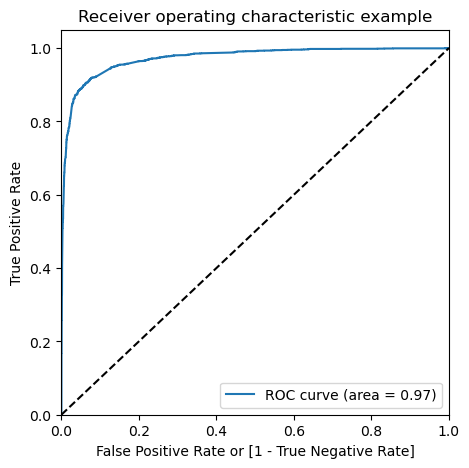

In [1238]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.97 which is a very good value

In [1239]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000568,0,1,0,0,0,0,0,0,0,0,0
1,1,0.521745,1,1,1,1,1,1,1,0,0,0,0
2,1,0.743361,1,1,1,1,1,1,1,1,1,0,0
3,1,0.933671,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010548,0,1,0,0,0,0,0,0,0,0,0


In [1240]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386956,1.000000,0.000000
0.1,0.1,0.843033,0.971774,0.761771
0.2,0.2,0.897644,0.948790,0.865360
0.3,0.3,0.921985,0.913710,0.927208
0.4,0.4,0.924637,0.899597,0.940443
0.5,0.5,0.927758,0.883468,0.955714
0.6,0.6,0.926042,0.862903,0.965895
0.7,0.7,0.922453,0.843548,0.972258
0.8,0.8,0.904197,0.783468,0.980402
0.9,0.9,0.882197,0.714113,0.988292


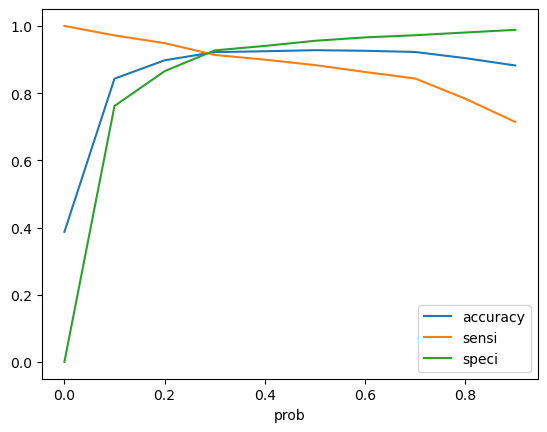

In [1241]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.3

In [1242]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000568,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.521745,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.743361,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.933671,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010548,0,1,0,0,0,0,0,0,0,0,0,0


In [1243]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9219847090029646

In [1244]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3643,  286],
       [ 214, 2266]], dtype=int64)

In [1245]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [1246]:
# Calculating the sensitivity
TP/(TP+FN)

0.9137096774193548

In [1247]:
# Calculating the specificity
TN/(TN+FP)

0.9272079409518962

In [1248]:
from sklearn.metrics import precision_score, recall_score

In [1249]:
y_train_pred_final.head(3)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000568,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.521745,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.743361,1,1,1,1,1,1,1,1,1,0,0,1


In [1250]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8879310344827587

In [1251]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9137096774193548

In [1252]:
from sklearn.metrics import precision_recall_curve

In [1253]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

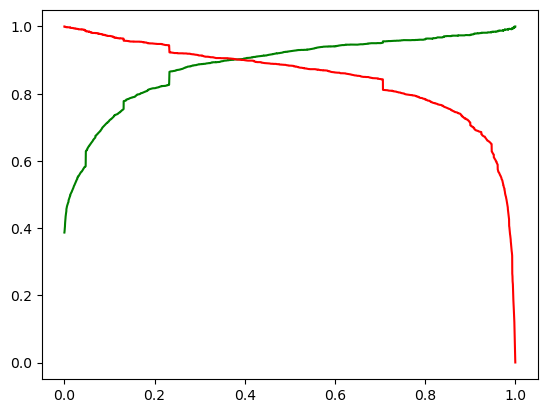

In [1254]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 92%

## Prediction on Test set

In [1255]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Not Provided
7359,3.648630,-0.066370,-0.209813,0.339519,-0.033059,0.0,1.508419,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2201,-0.274075,0.605399,-0.649354,0.090184,-0.033059,0.0,-0.662946,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2473,3.648630,1.948938,1.461527,-0.034484,-0.033059,0.0,-0.662946,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8388,-0.274075,-0.738140,-0.652972,-0.657823,-0.033059,0.0,1.508419,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2949,-0.274075,0.269514,-0.490179,-0.159152,-0.033059,0.0,1.508419,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1256]:
X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Specialization_E-COMMERCE', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1257]:
cols=['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Specialization_E-COMMERCE', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent']

In [1258]:
X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_E-COMMERCE,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent
7359,-0.066370,-0.209813,0.339519,1.508419,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2201,0.605399,-0.649354,0.090184,-0.662946,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2473,1.948938,1.461527,-0.034484,-0.662946,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8388,-0.738140,-0.652972,-0.657823,1.508419,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2949,0.269514,-0.490179,-0.159152,1.508419,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [1259]:
X_test_sm = sm.add_constant(X_test)

In [1260]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [1261]:
y_test_pred.head(4)

7359    0.017471
2201    0.001941
2473    0.999132
8388    0.001207
dtype: float64

In [1262]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [1263]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1264]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.017471
1,0,0.001941
2,1,0.999132
3,0,0.001207
4,0,0.000225


In [1265]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.017471,0
1,0,0.001941,0
2,1,0.999132,1
3,0,0.001207,0
4,0,0.000225,0


In [1266]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9315866084425036

In [1267]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1604,   99],
       [  89,  956]], dtype=int64)

In [1268]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [1269]:
# Calculating the sensitivity
TP/(TP+FN)

0.9148325358851674

In [1270]:
# Calculating the specificity
TN/(TN+FP)

0.9418672930123312

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 94%

### Precision-Recall

In [1271]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3755,  174],
       [ 289, 2191]], dtype=int64)

In [1272]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9264270613107822

In [1273]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8834677419354838

With the current cut off as 0.35 we have Precision around 92% and Recall around 88%

## Precision and recall tradeoff

In [1274]:
from sklearn.metrics import precision_recall_curve

In [1275]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: Converted, Length: 6409, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: Predicted, Length: 6409, dtype: int64)

In [1276]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

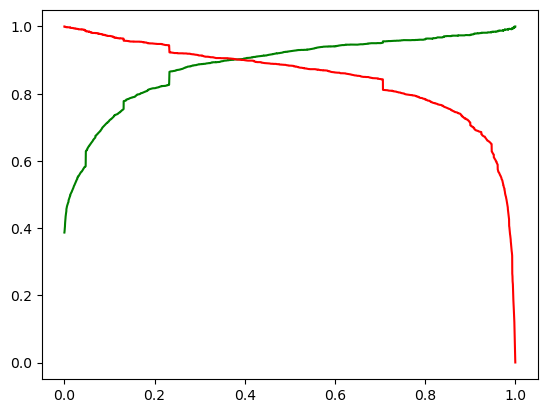

In [1277]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1278]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000568,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.521745,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.743361,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.933671,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010548,0,1,0,0,0,0,0,0,0,0,0,0


In [1279]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9246372288968638

In [1280]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3695,  234],
       [ 249, 2231]], dtype=int64)

In [1281]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [1282]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9050709939148073

In [1283]:
#Recall = TP / TP + FN
TP / (TP + FN)


0.8995967741935483

With the current cut off as 0.4 we have Precision around 90% and Recall around 89% and accuracy 92 %.

## Prediction on Test set

In [1284]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.017471
1,0,0.001941
2,1,0.999132
3,0,0.001207
4,0,0.000225


In [1285]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.017471,0
1,0,0.001941,0
2,1,0.999132,1
3,0,0.001207,0
4,0,0.000225,0


## Check the overall accuracy

In [1286]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9334061135371179

In [1287]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1627,   76],
       [ 107,  938]], dtype=int64)

In [1288]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [1289]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9250493096646942

In [1290]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8976076555023923

In [1325]:
# Calculating the specificity
TN/(TN+FP)

0.9553728714034058

In [1326]:
# Calculating the sensitivity
TP/(TP+FN)

0.8976076555023923

With the current cut off as 0.4 we have Precision around 92% , Recall around 89% and accuracy 93%.

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## Using Decision Trees

In [1291]:
y = df['Converted']
X=df.drop('Converted', axis=1)

In [1292]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [1293]:
X_train.shape, X_test.shape

((6409, 77), (2748, 77))

In [1294]:
from sklearn.tree import DecisionTreeClassifier

In [1295]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [1296]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [1297]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [1298]:
from sklearn.metrics import classification_report

In [1299]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1694
           1       0.92      0.76      0.83      1054

    accuracy                           0.88      2748
   macro avg       0.89      0.86      0.87      2748
weighted avg       0.88      0.88      0.88      2748



## Hyper-parameter tuning for the Decision Tree

In [1300]:
from sklearn.model_selection import GridSearchCV

In [1301]:
dt = DecisionTreeClassifier(random_state=42)

In [1302]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [1303]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1304]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 578 ms
Wall time: 5.61 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [1305]:
grid_search.best_score_

0.9307214430184353

In [1306]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)

## Using Random Forest

In [1307]:
from sklearn.ensemble import RandomForestClassifier

In [1308]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)


In [1309]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 104 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [1310]:
rf.oob_score_

0.8349196442502731

## Hyper-parameter tuning for the Random Forest

In [1311]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1312]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [1313]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1314]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 3.17 s
Wall time: 39.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [1315]:
grid_search.best_score_

0.9349342447019204

In [1316]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [1317]:
rf_best.feature_importances_

array([4.57084034e-03, 1.52849699e-02, 1.26959267e-01, 1.42362808e-02,
       0.00000000e+00, 0.00000000e+00, 2.69910202e-03, 5.70953152e-03,
       3.00136275e-02, 2.60731641e-05, 0.00000000e+00, 0.00000000e+00,
       4.31410203e-06, 4.91104639e-04, 1.75476085e-02, 2.17373836e-02,
       4.83712103e-04, 5.58346875e-04, 1.05791294e-04, 9.86164745e-05,
       1.27249233e-03, 1.47697378e-04, 1.51857332e-04, 1.21319766e-03,
       3.88692038e-04, 1.78814163e-04, 1.94049969e-03, 3.41546231e-04,
       7.56113444e-04, 1.25241863e-04, 4.23934735e-05, 6.65398223e-06,
       4.59964557e-04, 2.42092152e-04, 4.65003156e-03, 2.57867991e-03,
       3.99982763e-03, 1.20042376e-03, 2.33819016e-02, 7.05540794e-05,
       1.85544447e-04, 1.01379591e-02, 2.19958920e-03, 1.76978052e-03,
       4.81718826e-04, 6.19884266e-03, 7.18842247e-05, 2.56801531e-04,
       7.28411236e-03, 1.07976323e-03, 4.88838054e-02, 9.17370082e-05,
       3.15954591e-05, 2.05427448e-02, 4.64116063e-03, 4.84539878e-02,
      

In [1318]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [1319]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
63,Tags_Will revert after reading the email,0.288992
2,Total Time Spent on Website,0.126959
62,Tags_Ringing,0.071732
72,Last Notable Activity_SMS Sent,0.051488
50,Last Activity_SMS Sent,0.048884
...,...,...
12,What is your current occupation_Other,0.000004
4,Search,0.000000
10,Lead Origin_Quick Add Form,0.000000
5,Newspaper Article,0.000000


In [1320]:
X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Specialization_E-COMMERCE', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## Top 3 Columns that are very important are for the columns that were selected in Logistic Regression


In [1321]:
y = df['Converted']
X = df[cols]
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt = DecisionTreeClassifier(random_state=42)
grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_
rf_best.feature_importances_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


array([1.64287032e-02, 1.72428083e-01, 1.67638600e-02, 3.47849827e-03,
       1.29176128e-04, 1.06308116e-02, 4.27422669e-02, 2.21826780e-02,
       3.00410663e-03, 2.84514348e-03, 1.41497392e-02, 1.27433307e-02,
       6.25836990e-03, 7.67541396e-02, 1.25163518e-03, 1.36375667e-02,
       4.05177947e-02, 1.50121850e-03, 1.44613650e-03, 6.47102661e-02,
       3.67611504e-01, 3.38357669e-03, 9.91551352e-03, 7.74457573e-05,
       5.85767728e-03, 8.95507589e-02])

In [1322]:
X_train.shape

(6409, 26)

In [1323]:
rf_best.feature_importances_.shape

(26,)

In [1324]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
}) 
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
20,Tags_Will revert after reading the email,0.367612
1,Total Time Spent on Website,0.172428
25,Last Notable Activity_SMS Sent,0.089551
13,Tags_Closed by Horizzon,0.076754
19,Tags_Ringing,0.064710
6,Lead Source_Reference,0.042742
16,Tags_Lost to EINS,0.040518
7,Lead Source_Welingak Website,0.022183
2,Page Views Per Visit,0.016764
0,TotalVisits,0.016429


## Top Columns based on the Final columns selected in the Logistic Regression 
#### Tags_Will revert after reading the email
#### Total Time Spent on Website
#### Last Notable Activity_SMS Sent